# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Dev & archived Codes

In [ ]:
offer_trans_final_kmeans_df = offer_trans_final_df[["amount", "offer_type"]]

In [ ]:
final_df = pd.concat([offer_trans_final_kmeans_df, pd.get_dummies(offer_trans_final_kmeans_df["offer_type"])], axis=1)

In [ ]:
offer_trans_final_kmeans_final_df.head()

In [ ]:
offer_trans_final_kmeans_final_df.drop(columns=["offer_type"], inplace=True)

In [ ]:
offer_trans_final_kmeans_final_df.head()

In [ ]:
offer_trans_final_kmeans_final_norm_df = offer_trans_final_kmeans_final_df.copy()

In [ ]:
offer_trans_final_kmeans_final_norm_df["amount"] = whiten(offer_trans_final_kmeans_final_df["amount"])

In [ ]:
offer_trans_final_kmeans_final_norm_df.head()

In [ ]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(offer_trans_final_kmeans_final_norm_df, i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
plt.plot(elbow_plot["num_clusters"], elbow_plot["distortions"])
plt.xticks(elbow_plot["num_clusters"])

Try 2 clusters

In [ ]:
cluster_centers, distortion = kmeans(offer_trans_final_kmeans_final_norm_df, 2)

In [ ]:
offer_trans_final_kmeans_final_norm_df['cluster_labels'], distortion_list = vq(offer_trans_final_kmeans_final_norm_df, cluster_centers)

In [ ]:
offer_trans_final_kmeans_final_norm_df.groupby('cluster_labels').count()

In [ ]:
offer_trans_final_kmeans_final_norm_df.groupby('cluster_labels').agg({"bogo":sum, "discount":sum, "informational":sum, "amount":sum})

In [ ]:
offer_trans_final_kmeans_final_norm_df.groupby('cluster_labels').agg({"bogo":sum, "discount":sum, "informational":sum, "amount":sum})

Try 3 clusters

In [ ]:
cluster_centers, distortion = kmeans(offer_trans_final_kmeans_final_norm_df, 3)

In [ ]:
offer_trans_final_kmeans_final_norm_df['cluster_labels'], distortion_list = vq(offer_trans_final_kmeans_final_norm_df, cluster_centers)

In [ ]:
offer_trans_final_kmeans_final_norm_df.groupby('cluster_labels').count()

In [ ]:
offer_trans_final_kmeans_final_norm_df.groupby('cluster_labels').agg({"bogo":sum, "discount":sum, "informational":sum, "amount":sum})

Validate trans_info_full_final_df_temp df

In [303]:
trans_info_full_final_df[trans_info_full_final_df[["customer_id", "portfolio_id"]].duplicated()]

,customer_id,portfolio_id,amount


In [304]:
trans_info_full_final_df[(trans_info_full_final_df["customer_id"] == "0020c2b971eb4e9188eac86d93036a77") &\
                             (trans_info_full_final_df["portfolio_id"] == "5a8bc65990b245e5a138643cd4eb9837")
                             ]

,customer_id,portfolio_id,amount
2,0020c2b971eb4e9188eac86d93036a77,5a8bc65990b245e5a138643cd4eb9837,51.1


Need to validate the data quality in transcript_disc_clean_df

ffecb1f8543f4bf7bade023de366d6bf	576.0	336	0b1e1539f2cc45b7b9fa7c272da2e1d7	510.0	3.49
ffecb1f8543f4bf7bade023de366d6bf	744.0	504	0b1e1539f2cc45b7b9fa7c272da2e1d7	510.0	3.49

In [287]:
transcript[(transcript["customer_id"] == "ffecb1f8543f4bf7bade023de366d6bf")\
          & (transcript["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7")
          ]

,event,customer_id,time,reward,amount,portfolio_id,datetime
122827,offer received,ffecb1f8543f4bf7bade023de366d6bf,336,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-15 00:00:00
137306,offer viewed,ffecb1f8543f4bf7bade023de366d6bf,360,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-16 00:00:00
213575,offer received,ffecb1f8543f4bf7bade023de366d6bf,504,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-22 00:00:00
305343,offer viewed,ffecb1f8543f4bf7bade023de366d6bf,708,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-30 12:00:00


In [288]:
transcript_disc_pro_cleaned_df[(transcript_disc_pro_cleaned_df["customer_id"] == "ffecb1f8543f4bf7bade023de366d6bf")\
          & (transcript_disc_pro_cleaned_df["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7")
          ]

,customer_id,portfolio_id,offer_received_time,offer_end_time


In [289]:
transcript_disc_clean_df[(transcript_disc_clean_df["customer_id"] == "ffecb1f8543f4bf7bade023de366d6bf")\
          & (transcript_disc_clean_df["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7")
          ]

,customer_id,portfolio_id,offer_received_time,duration,offer_end_time
17646,ffecb1f8543f4bf7bade023de366d6bf,0b1e1539f2cc45b7b9fa7c272da2e1d7,336,240.0,576.0
29791,ffecb1f8543f4bf7bade023de366d6bf,0b1e1539f2cc45b7b9fa7c272da2e1d7,504,240.0,744.0


In [295]:
trans_disc_full_final_df_test = trans_disc_full_final_df_temp[((trans_disc_full_final_df_temp["time"] >= \
                              trans_disc_full_final_df_temp["offer_received_time"]) \
                             & (trans_disc_full_final_df_temp["time"] <= \
                              trans_disc_full_final_df_temp["offer_end_time"])) \
                              | (trans_disc_full_final_df_temp["time"].isnull())
                             ].sort_values(["customer_id", "portfolio_id", "time"])

In [297]:
trans_disc_full_final_df_test[["customer_id", "portfolio_id", "amount"]].duplicated().sum()

1084

In [298]:
trans_disc_full_final_df_test.shape

(46242, 6)

In [299]:
1084/46242

0.023441892651701917

In [290]:
(transcript_disc_clean_df.groupby(["customer_id", "portfolio_id"])\
['offer_end_time'].count().reset_index()["offer_end_time"] > 1).unique()

array([False,  True], dtype=bool)

In [281]:
trans_disc_full_final_df_temp["time"].isnull().sum()

796

In [283]:
transcript_disc_pro_cleaned_df[(transcript_disc_pro_cleaned_df["customer_id"] == "00e20b4ca129458aaab0f4727ef3513a") &\
(transcript_disc_pro_cleaned_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")]

,customer_id,portfolio_id,offer_received_time,offer_end_time
0,00e20b4ca129458aaab0f4727ef3513a,fafdcd668e3743c1bb461111dcafc2a4,408,618.0


In [291]:
transcript_disc_val_df = transcript_disc_final_df.groupby(["customer_id", "portfolio_id", "offer_received_time"]).\
agg({"offer_end_time":pd.Series.nunique}).reset_index()

In [293]:
transcript_disc_val_df.head()

,customer_id,portfolio_id,offer_received_time,offer_end_time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576,1.0
1,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504,1.0
2,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408,1.0
3,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,168,1.0
4,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,0,1.0


In [292]:
transcript_disc_val_df.loc[transcript_disc_val_df["offer_end_time"]>1, "offer_end_time"].unique()

array([ 2.,  3.])

Check the data have 3 end times

In [290]:
transcript_disc_val_df.loc[transcript_disc_val_df["offer_end_time"]==3, :]

,customer_id,portfolio_id,duration,offer_received_time,offer_end_time
5025,2c5c63e5124e417b8504f76c868a4190,fafdcd668e3743c1bb461111dcafc2a4,240.0,336,3.0
10742,5ccc9ec750834277812d9a81d44debb7,fafdcd668e3743c1bb461111dcafc2a4,240.0,336,3.0
17429,96ae94b7eb5e404bbe7a5fe07a7d7035,fafdcd668e3743c1bb461111dcafc2a4,240.0,336,3.0
25721,df3abdb6b90840eeaed0934c453d6dc5,2906b810c7d4411798c6938adc9daaa5,168.0,336,3.0
25879,e0af91a9e5b041f59c6ff8f6df50bcd7,fafdcd668e3743c1bb461111dcafc2a4,240.0,408,3.0
26995,ea54840ba8a54a098de60d39fc533d51,2298d6c36e964ae4a3e7e9706d1fb8c2,168.0,336,3.0
27382,edc7b04392144da9979f3077095f268a,fafdcd668e3743c1bb461111dcafc2a4,240.0,336,3.0
27383,edc7b04392144da9979f3077095f268a,fafdcd668e3743c1bb461111dcafc2a4,240.0,408,3.0
27642,f017b77d373f480299a8035d844286ff,fafdcd668e3743c1bb461111dcafc2a4,240.0,408,3.0


Example: 2c5c63e5124e417b8504f76c868a4190	fafdcd668e3743c1bb461111dcafc2a4

In [273]:
transcript_disc_final_df[(transcript_disc_final_df["customer_id"] == "2c5c63e5124e417b8504f76c868a4190") \
                         & (transcript_disc_final_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4") \
                        & (transcript_disc_final_df["offer_received_time"] == 336)
                        ]

,customer_id,portfolio_id,offer_received_time,duration,offer_end_time
11894,2c5c63e5124e417b8504f76c868a4190,fafdcd668e3743c1bb461111dcafc2a4,336,240.0,366.0
11895,2c5c63e5124e417b8504f76c868a4190,fafdcd668e3743c1bb461111dcafc2a4,336,240.0,444.0
11896,2c5c63e5124e417b8504f76c868a4190,fafdcd668e3743c1bb461111dcafc2a4,336,240.0,564.0


In [275]:
transcript_disc_final_df_temp[(transcript_disc_final_df_temp["customer_id"] == "2c5c63e5124e417b8504f76c868a4190") &\
                              (transcript_disc_final_df_temp["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4") &\
                              (transcript_disc_final_df_temp["offer_received_time"] == 336)
                             ]

,customer_id,portfolio_id,event_x,offer_received_time,amount_x,duration_x,offer_type_x,offer_end_time,event_y,offer_completed_time,amount_y,duration_y,offer_type_y
11894,2c5c63e5124e417b8504f76c868a4190,fafdcd668e3743c1bb461111dcafc2a4,offer received,336,0.0,240.0,discount,576.0,offer completed,366.0,0.0,240.0,discount
11895,2c5c63e5124e417b8504f76c868a4190,fafdcd668e3743c1bb461111dcafc2a4,offer received,336,0.0,240.0,discount,576.0,offer completed,444.0,0.0,240.0,discount
11896,2c5c63e5124e417b8504f76c868a4190,fafdcd668e3743c1bb461111dcafc2a4,offer received,336,0.0,240.0,discount,576.0,offer completed,564.0,0.0,240.0,discount


Check data with 2 end times

In [277]:
transcript_disc_val_df.loc[transcript_disc_val_df["offer_end_time"]== 2, :].head()

,customer_id,portfolio_id,offer_received_time,offer_end_time
94,00e20b4ca129458aaab0f4727ef3513a,fafdcd668e3743c1bb461111dcafc2a4,408,2.0
100,00e9f403afa641889cd034ee7c7ca6e9,0b1e1539f2cc45b7b9fa7c272da2e1d7,408,2.0
143,015c3d28c67e46aa95e9ec97c27220e8,fafdcd668e3743c1bb461111dcafc2a4,168,2.0
267,0246e7cc7a3d4a98a940cb13776b5b55,fafdcd668e3743c1bb461111dcafc2a4,504,2.0
268,0246e7cc7a3d4a98a940cb13776b5b55,fafdcd668e3743c1bb461111dcafc2a4,576,2.0


Example: 00e20b4ca129458aaab0f4727ef3513a	fafdcd668e3743c1bb461111dcafc2a4	408

In [278]:
transcript_disc_final_df[(transcript_disc_final_df["customer_id"] == "00e20b4ca129458aaab0f4727ef3513a") \
                         & (transcript_disc_final_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4") \
                        & (transcript_disc_final_df["offer_received_time"] == 408)
                        ]

,customer_id,portfolio_id,offer_received_time,duration,offer_end_time
21879,00e20b4ca129458aaab0f4727ef3513a,fafdcd668e3743c1bb461111dcafc2a4,408,240.0,426.0
21880,00e20b4ca129458aaab0f4727ef3513a,fafdcd668e3743c1bb461111dcafc2a4,408,240.0,618.0


In [280]:
transcript_disc_final_df_temp[(transcript_disc_final_df_temp["customer_id"] == "00e20b4ca129458aaab0f4727ef3513a") \
                              & (transcript_disc_final_df_temp["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4") \
#                               & (transcript_disc_final_df_temp["offer_received_time"] == 408)
                             ]

,customer_id,portfolio_id,event_x,offer_received_time,amount_x,duration_x,offer_type_x,offer_end_time,event_y,offer_completed_time,amount_y,duration_y,offer_type_y
21879,00e20b4ca129458aaab0f4727ef3513a,fafdcd668e3743c1bb461111dcafc2a4,offer received,408,0.0,240.0,discount,648.0,offer completed,426.0,0.0,240.0,discount
21880,00e20b4ca129458aaab0f4727ef3513a,fafdcd668e3743c1bb461111dcafc2a4,offer received,408,0.0,240.0,discount,648.0,offer completed,618.0,0.0,240.0,discount
33876,00e20b4ca129458aaab0f4727ef3513a,fafdcd668e3743c1bb461111dcafc2a4,offer received,576,0.0,240.0,discount,816.0,offer completed,618.0,0.0,240.0,discount


00e9f403afa641889cd034ee7c7ca6e9	0b1e1539f2cc45b7b9fa7c272da2e1d7

In [281]:
transcript_disc_final_df[(transcript_disc_final_df["customer_id"] == "00e9f403afa641889cd034ee7c7ca6e9") \
                         & (transcript_disc_final_df["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7") \
                        & (transcript_disc_final_df["offer_received_time"] == 408)
                        ]

,customer_id,portfolio_id,offer_received_time,duration,offer_end_time
22885,00e9f403afa641889cd034ee7c7ca6e9,0b1e1539f2cc45b7b9fa7c272da2e1d7,408,240.0,432.0
22886,00e9f403afa641889cd034ee7c7ca6e9,0b1e1539f2cc45b7b9fa7c272da2e1d7,408,240.0,540.0


In [282]:
transcript_disc_final_df_temp[(transcript_disc_final_df_temp["customer_id"] == "00e9f403afa641889cd034ee7c7ca6e9") \
                              & (transcript_disc_final_df_temp["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7") \
#                               & (transcript_disc_final_df_temp["offer_received_time"] == 408)
                             ]

,customer_id,portfolio_id,event_x,offer_received_time,amount_x,duration_x,offer_type_x,offer_end_time,event_y,offer_completed_time,amount_y,duration_y,offer_type_y
22885,00e9f403afa641889cd034ee7c7ca6e9,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount,648.0,offer completed,432.0,0.0,240.0,discount
22886,00e9f403afa641889cd034ee7c7ca6e9,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount,648.0,offer completed,540.0,0.0,240.0,discount
28929,00e9f403afa641889cd034ee7c7ca6e9,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,504,0.0,240.0,discount,744.0,offer completed,540.0,0.0,240.0,discount


In [252]:
test_df = transcript_disc_received_df.groupby(["customer_id", "portfolio_id"])["offer_received_time"].count().reset_index()

In [253]:
test_final_df = test_df.loc[test_df["offer_received_time"]> 1, ["customer_id", "portfolio_id"]].drop_duplicates()

In [254]:
test_df.loc[test_df["offer_received_time"]> 1, ].drop_duplicates()["offer_received_time"].unique()

array([2, 3, 4, 5])

In [255]:
test_df[test_df["offer_received_time"]==5]

,customer_id,portfolio_id,offer_received_time
4549,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,5
6722,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,5


In [256]:
transcript_disc_received_df[["customer_id", "portfolio_id"]].drop_duplicates().count()

customer_id     25316
portfolio_id    25316
dtype: int64

In [257]:
test_final_df.head()

,customer_id,portfolio_id
4,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4
7,003d66b6608740288d6cc97a6903f4f0,fafdcd668e3743c1bb461111dcafc2a4
9,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5
12,004c5799adbf42868b9cff0396190900,fafdcd668e3743c1bb461111dcafc2a4
19,0069a50874d846438e58acff5e594725,2906b810c7d4411798c6938adc9daaa5


In [258]:
test_final_df.count()

customer_id     4721
portfolio_id    4721
dtype: int64

In [259]:
4721/25316

0.18648285669142045

In [260]:
transcript_disc_received_df[(transcript_disc_received_df["customer_id"] == "0020c2b971eb4e9188eac86d93036a77") \
                            & (transcript_disc_received_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")] 

,customer_id,portfolio_id,event,offer_received_time,amount,duration,offer_type,offer_end_time
1889,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,offer received,0,0.0,240.0,discount,240.0
92651,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,offer received,336,0.0,240.0,discount,576.0


In [261]:
test_final_df_v2 = transcript_disc_received_df[(transcript_disc_received_df["customer_id"].isin(test_final_df["customer_id"]))\
                           & (transcript_disc_received_df["portfolio_id"].isin(test_final_df["portfolio_id"]))
                           ].sort_values(by=["customer_id", "portfolio_id"])

In [262]:
test_final_df_v2_shifted = test_final_df_v2.shift(1)

In [263]:
test_final_df_v2_shifted.head()

,customer_id,portfolio_id,event,offer_received_time,amount,duration,offer_type,offer_end_time
1889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92651,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,offer received,0.0,0.0,240.0,discount,240.0
174891,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,offer received,336.0,0.0,240.0,discount,576.0
45914,003d66b6608740288d6cc97a6903f4f0,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,504.0,0.0,240.0,discount,744.0
129271,003d66b6608740288d6cc97a6903f4f0,fafdcd668e3743c1bb461111dcafc2a4,offer received,168.0,0.0,240.0,discount,408.0


In [264]:
test_final_df_v2_shifted = test_final_df_v2_shifted.drop(1889)

In [265]:
test_final_new_df = test_final_df_v2.merge(test_final_df_v2_shifted, how = "inner", on = ["customer_id", "portfolio_id"])

In [266]:
test_final_new_overlap_df = test_final_new_df.loc[(test_final_new_df["offer_received_time_x"]<=test_final_new_df["offer_received_time_y"]) &
                 (test_final_new_df["offer_received_time_y"] <= test_final_new_df["offer_end_time_x"]) &\
                (test_final_new_df["offer_received_time_y"] != test_final_new_df["offer_received_time_x"])                                , \
                 ]

In [267]:
1717/4721

0.3636941325990256

In [268]:
# transcript[transcript["person"] == "0069a50874d846438e58acff5e594725"]

In [269]:
transcript_disc_received_df[(transcript_disc_received_df["customer_id"] == "0069a50874d846438e58acff5e594725") \
                            & (transcript_disc_received_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")] 

,customer_id,portfolio_id,event,offer_received_time,amount,duration,offer_type,offer_end_time
165455,0069a50874d846438e58acff5e594725,2906b810c7d4411798c6938adc9daaa5,offer received,504,0.0,168.0,discount,672.0
200043,0069a50874d846438e58acff5e594725,2906b810c7d4411798c6938adc9daaa5,offer received,576,0.0,168.0,discount,744.0


In [270]:
transcript_disc_completed_df[(transcript_disc_completed_df["customer_id"] == "0069a50874d846438e58acff5e594725") \
                            & (transcript_disc_completed_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")]

,customer_id,portfolio_id,event,offer_completed_time,amount,duration,offer_type
244675,0069a50874d846438e58acff5e594725,2906b810c7d4411798c6938adc9daaa5,offer completed,696,0.0,168.0,discount


In [271]:
transcript[(transcript["event"] == "transaction") & \
          (transcript["customer_id"] == "0069a50874d846438e58acff5e594725") & \
          (transcript["time"] >= 504) &\
           (transcript["time"]<= 744)
          ]

,event,customer_id,time,amount,reward,portfolio_id,datetime
279923,transaction,0069a50874d846438e58acff5e594725,618,5.12,0,0,2020-05-26 18:00:00
302172,transaction,0069a50874d846438e58acff5e594725,696,7.97,0,0,2020-05-30 00:00:00


In [272]:
test_df[test_df["offer_received_time"]==5]

,customer_id,portfolio_id,offer_received_time
4549,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,5
6722,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,5


In [273]:
transcript_disc_df[(transcript_disc_df["customer_id"] == "2ea50de315514ccaa5079db4c1ecbc0b") & \
                  (transcript_disc_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")
                  ]

,customer_id,portfolio_id,event,time,amount,duration,offer_type
48886,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,168,0.0,240.0,discount
96441,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,336,0.0,240.0,discount
127478,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,408,0.0,240.0,discount
168713,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,504,0.0,240.0,discount
184435,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer completed,528,0.0,240.0,discount
184436,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer completed,528,0.0,240.0,discount
203330,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,576,0.0,240.0,discount
238454,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer completed,666,0.0,240.0,discount


In [274]:
transcript_disc_received_df[(transcript_disc_received_df["customer_id"] == "2ea50de315514ccaa5079db4c1ecbc0b") & \
                  (transcript_disc_received_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")
                  ]

,customer_id,portfolio_id,event,offer_received_time,amount,duration,offer_type,offer_end_time
48886,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,168,0.0,240.0,discount,408.0
96441,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,336,0.0,240.0,discount,576.0
127478,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,408,0.0,240.0,discount,648.0
168713,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,504,0.0,240.0,discount,744.0
203330,2ea50de315514ccaa5079db4c1ecbc0b,fafdcd668e3743c1bb461111dcafc2a4,offer received,576,0.0,240.0,discount,816.0


In [275]:
transcript_disc_df[(transcript_disc_df["customer_id"] == "43a50d7e5c8547a9aa1ec31291b9fc30") & \
                  (transcript_disc_df["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7")
                  ]

,customer_id,portfolio_id,event,time,amount,duration,offer_type
5619,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,0,0.0,240.0,discount
48894,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,168,0.0,240.0,discount
57831,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer completed,174,0.0,240.0,discount
97985,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,336,0.0,240.0,discount
126872,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount
203340,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,576,0.0,240.0,discount


In [276]:
transcript_disc_received_df[(transcript_disc_received_df["customer_id"] == "43a50d7e5c8547a9aa1ec31291b9fc30") & \
                  (transcript_disc_received_df["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7")
                  ]

,customer_id,portfolio_id,event,offer_received_time,amount,duration,offer_type,offer_end_time
5619,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,0,0.0,240.0,discount,240.0
48894,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,168,0.0,240.0,discount,408.0
97985,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,336,0.0,240.0,discount,576.0
126872,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount,648.0
203340,43a50d7e5c8547a9aa1ec31291b9fc30,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,576,0.0,240.0,discount,816.0


In [277]:
test_df.groupby("offer_received_time").count()/test_df.shape[0]

,customer_id,portfolio_id
offer_received_time,,
1,0.813517,0.813517
2,0.167760,0.167760
3,0.017538,0.017538
4,0.001106,0.001106
5,0.000079,0.000079


In [278]:
test_df[test_df["offer_received_time"]==4]

,customer_id,portfolio_id,offer_received_time
494,04fa747cd2d841bcaf08f0a64e82bbef,2906b810c7d4411798c6938adc9daaa5,4
1439,0ea1f0bb1ba245abbf709b962d326dd7,2906b810c7d4411798c6938adc9daaa5,4
2232,1679b7af5a294c6d9ae961232318ad55,0b1e1539f2cc45b7b9fa7c272da2e1d7,4
2767,1c8cf4af93464dcaa971cfcffc2cc1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,4
3843,281d463f31e74ecaa4451d169868c5d7,2298d6c36e964ae4a3e7e9706d1fb8c2,4
4442,2dab8c385a2440b78b432ecb72d68787,2298d6c36e964ae4a3e7e9706d1fb8c2,4
4530,2e7dd52a1b9b49dd90f5cd3cd8ad9636,fafdcd668e3743c1bb461111dcafc2a4,4
5199,3526938fb466470190a504a751ec07b0,0b1e1539f2cc45b7b9fa7c272da2e1d7,4
6114,3db080837a5f4137aeb5cab01f739866,2906b810c7d4411798c6938adc9daaa5,4
7198,487ad048c0e248a8bf6eb1545f5be4c6,2906b810c7d4411798c6938adc9daaa5,4


In [279]:
transcript_disc_df["time"].max()

714

In [280]:
714/168

4.25

In [281]:
transcript_disc_df["duration"].unique()

array([ 240.,  168.])

In [282]:
transcript_disc_df[["portfolio_id", "duration"]].drop_duplicates()

,portfolio_id,duration
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,240.0
2,2906b810c7d4411798c6938adc9daaa5,168.0
3,fafdcd668e3743c1bb461111dcafc2a4,240.0
6,2298d6c36e964ae4a3e7e9706d1fb8c2,168.0


In [283]:
714/168

4.25

In [284]:
test_df[(test_df["portfolio_id"].isin(["2906b810c7d4411798c6938adc9daaa5", "2298d6c36e964ae4a3e7e9706d1fb8c2"])) \
        & (test_df["offer_received_time"] == 2)]

,customer_id,portfolio_id,offer_received_time
9,00426fe3ffde4c6b9cb9ad6d077a13ea,2906b810c7d4411798c6938adc9daaa5,2
19,0069a50874d846438e58acff5e594725,2906b810c7d4411798c6938adc9daaa5,2
23,00840a2ca5d2408e982d56544dc14ffd,2906b810c7d4411798c6938adc9daaa5,2
31,0099bf30e4cb4265875266eb3eb25eab,2906b810c7d4411798c6938adc9daaa5,2
34,009d10c2c38a4fd795a7bc6ddbbddb78,2298d6c36e964ae4a3e7e9706d1fb8c2,2
37,00ae03011f9f49b8a4b3e6d416678b0b,2298d6c36e964ae4a3e7e9706d1fb8c2,2
40,00b18b535d6d4f779dea4dc9ac451478,2298d6c36e964ae4a3e7e9706d1fb8c2,2
51,00bc42a62f884b41a13cc595856cf7c3,2906b810c7d4411798c6938adc9daaa5,2
67,00c91f31f5f74e769fa7a359b63e1a9f,2298d6c36e964ae4a3e7e9706d1fb8c2,2
78,00d7c95f793a4212af44e632fdc1e431,2906b810c7d4411798c6938adc9daaa5,2


In [285]:
transcript_disc_df[(transcript_disc_df["customer_id"] == "fee2d799672d4f81bfa3237207290f79") & \
                  (transcript_disc_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")
                  ]

,customer_id,portfolio_id,event,time,amount,duration,offer_type
9962,fee2d799672d4f81bfa3237207290f79,fafdcd668e3743c1bb461111dcafc2a4,offer received,0,0.0,240.0,discount
13626,fee2d799672d4f81bfa3237207290f79,fafdcd668e3743c1bb461111dcafc2a4,offer completed,6,0.0,240.0,discount
44920,fee2d799672d4f81bfa3237207290f79,fafdcd668e3743c1bb461111dcafc2a4,offer received,168,0.0,240.0,discount
58777,fee2d799672d4f81bfa3237207290f79,fafdcd668e3743c1bb461111dcafc2a4,offer completed,180,0.0,240.0,discount
123488,fee2d799672d4f81bfa3237207290f79,fafdcd668e3743c1bb461111dcafc2a4,offer received,408,0.0,240.0,discount
134844,fee2d799672d4f81bfa3237207290f79,fafdcd668e3743c1bb461111dcafc2a4,offer completed,408,0.0,240.0,discount


In [286]:
transcript_disc_received_df[(transcript_disc_received_df["customer_id"] == "fff3ba4757bd42088c044ca26d73817a") & \
                  (transcript_disc_received_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")
                  ]

,customer_id,portfolio_id,event,offer_received_time,amount,duration,offer_type,offer_end_time
125643,fff3ba4757bd42088c044ca26d73817a,2906b810c7d4411798c6938adc9daaa5,offer received,408,0.0,168.0,discount,576.0
201537,fff3ba4757bd42088c044ca26d73817a,2906b810c7d4411798c6938adc9daaa5,offer received,576,0.0,168.0,discount,744.0


In [287]:
transcript_disc_df[(transcript_disc_df["customer_id"] == "fff3ba4757bd42088c044ca26d73817a") \
                   & (transcript_disc_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")]

,customer_id,portfolio_id,event,time,amount,duration,offer_type
125643,fff3ba4757bd42088c044ca26d73817a,2906b810c7d4411798c6938adc9daaa5,offer received,408,0.0,168.0,discount
184168,fff3ba4757bd42088c044ca26d73817a,2906b810c7d4411798c6938adc9daaa5,offer completed,528,0.0,168.0,discount
201537,fff3ba4757bd42088c044ca26d73817a,2906b810c7d4411798c6938adc9daaa5,offer received,576,0.0,168.0,discount


In [288]:
transcript_disc_received_df[(transcript_disc_received_df["customer_id"] == "f017b77d373f480299a8035d844286ff") & \
                  (transcript_disc_received_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")
                  ]

,customer_id,portfolio_id,event,offer_received_time,amount,duration,offer_type,offer_end_time
133965,f017b77d373f480299a8035d844286ff,fafdcd668e3743c1bb461111dcafc2a4,offer received,408,0.0,240.0,discount,648.0
175224,f017b77d373f480299a8035d844286ff,fafdcd668e3743c1bb461111dcafc2a4,offer received,504,0.0,240.0,discount,744.0
209881,f017b77d373f480299a8035d844286ff,fafdcd668e3743c1bb461111dcafc2a4,offer received,576,0.0,240.0,discount,816.0


In [289]:
test_final_new_df[(test_final_new_df["customer_id"] == "7a30763c05734cb3bd14123e1b6b9d63") & \
                 (test_final_new_df["portfolio_id"] == "0b1e1539f2cc45b7b9fa7c272da2e1d7")]

,customer_id,portfolio_id,event_x,offer_received_time_x,amount_x,duration_x,offer_type_x,offer_end_time_x,event_y,offer_received_time_y,amount_y,duration_y,offer_type_y,offer_end_time_y
12332,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,336,0.0,240.0,discount,576.0,offer received,336.0,0.0,240.0,discount,576.0
12333,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,336,0.0,240.0,discount,576.0,offer received,408.0,0.0,240.0,discount,648.0
12334,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,336,0.0,240.0,discount,576.0,offer received,504.0,0.0,240.0,discount,744.0
12335,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,336,0.0,240.0,discount,576.0,offer received,576.0,0.0,240.0,discount,816.0
12336,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount,648.0,offer received,336.0,0.0,240.0,discount,576.0
12337,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount,648.0,offer received,408.0,0.0,240.0,discount,648.0
12338,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount,648.0,offer received,504.0,0.0,240.0,discount,744.0
12339,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,408,0.0,240.0,discount,648.0,offer received,576.0,0.0,240.0,discount,816.0
12340,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,504,0.0,240.0,discount,744.0,offer received,336.0,0.0,240.0,discount,576.0
12341,7a30763c05734cb3bd14123e1b6b9d63,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer received,504,0.0,240.0,discount,744.0,offer received,408.0,0.0,240.0,discount,648.0


In [290]:
test_final_new_overlap_df[(test_final_new_overlap_df["customer_id"] == "04fa747cd2d841bcaf08f0a64e82bbef") &\
                          (test_final_new_overlap_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")]

,customer_id,portfolio_id,event_x,offer_received_time_x,amount_x,duration_x,offer_type_x,offer_end_time_x,event_y,offer_received_time_y,amount_y,duration_y,offer_type_y,offer_end_time_y
566,04fa747cd2d841bcaf08f0a64e82bbef,2906b810c7d4411798c6938adc9daaa5,offer received,0,0.0,168.0,discount,168.0,offer received,168.0,0.0,168.0,discount,336.0
571,04fa747cd2d841bcaf08f0a64e82bbef,2906b810c7d4411798c6938adc9daaa5,offer received,168,0.0,168.0,discount,336.0,offer received,336.0,0.0,168.0,discount,504.0


In [255]:
transcript_end_df = transcript_new.loc[transcript_new["event"] == "offer received", ["customer_id", "portfolio_id", "time", "duration"]]

In [256]:
transcript_end_df["offer_end_time"] = transcript_end_df["time"] + transcript_end_df["duration"]

In [257]:
transcript_end_df = transcript_end_df.drop(columns = ["duration"])

In [258]:
transcript_end_df = transcript_end_df.rename(columns={"time":"offer_received_time"})

In [259]:
transcript_done_df = transcript_new.loc[transcript_new["event"] == "offer completed", ["customer_id", "portfolio_id", "time", "duration"]]

In [260]:
transcript_done_df.head()

,customer_id,portfolio_id,time,duration
12652,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,0,168.0
12656,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,0,240.0
12658,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,168.0
12662,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,0,168.0
12664,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,0,120.0


In [261]:
transcript_done_df = transcript_done_df.rename(columns = {"time":"offer_completed_time"})
transcript_done_df = transcript_done_df.drop(columns = "duration")

In [262]:
transcript_done_df.head()

,customer_id,portfolio_id,offer_completed_time
12652,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,0
12656,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,0
12658,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
12662,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,0
12664,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [265]:
transcript_end_df.shape, transcript_done_df.shape

((76277, 4), (33579, 3))

In [271]:
transcript_new_temp_df = transcript_end_df.merge(transcript_done_df, how="left", on =["customer_id", "portfolio_id"])

In [276]:
transcript_new_temp_df[transcript_new_temp_df['offer_completed_time'].isnull()].duplicated().unique()

array([False], dtype=bool)

In [280]:
transcript_not_completed_df = transcript_new_temp_df[transcript_new_temp_df['offer_completed_time'].isnull()]

In [290]:
transcript_not_completed_df[(transcript_not_completed_df["customer_id"] == "fff3ba4757bd42088c044ca26d73817a") & \
                           (transcript_not_completed_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")
                           ]

,customer_id,portfolio_id,offer_received_time,offer_end_time,offer_completed_time


In [291]:
transcript_new_temp_df[(transcript_new_temp_df["customer_id"] == "fff3ba4757bd42088c044ca26d73817a") & \
                       (transcript_new_temp_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")
                      ]

,customer_id,portfolio_id,offer_received_time,offer_end_time,offer_completed_time
47423,fff3ba4757bd42088c044ca26d73817a,2906b810c7d4411798c6938adc9daaa5,408,576.0,528.0
76334,fff3ba4757bd42088c044ca26d73817a,2906b810c7d4411798c6938adc9daaa5,576,744.0,528.0


In [289]:
transcript[(transcript["customer_id"] == "fff3ba4757bd42088c044ca26d73817a") & \
          (transcript["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")]

,event,customer_id,time,amount,reward,portfolio_id,datetime
154453,offer received,fff3ba4757bd42088c044ca26d73817a,408,0.0,0,2906b810c7d4411798c6938adc9daaa5,2020-05-18
228643,offer completed,fff3ba4757bd42088c044ca26d73817a,528,0.0,2,2906b810c7d4411798c6938adc9daaa5,2020-05-23
248948,offer received,fff3ba4757bd42088c044ca26d73817a,576,0.0,0,2906b810c7d4411798c6938adc9daaa5,2020-05-25


Need to think about these scenarios:
1. users complete none offers
2. users completed one offer out of two times
3. users completed all the offers

Also need to think about if need to split the dataframe by offer type

In [270]:
transcript_new_temp_df = transcript_new_temp_df[(transcript_new_temp_df["offer_received_time"] <= transcript_new_temp_df["offer_completed_time"])&\
       (transcript_new_temp_df["offer_end_time"] >= transcript_new_temp_df["offer_completed_time"])]

In [288]:
transcript_new[transcript_new["event"] == "offer completed"].groupby(["customer_id", "portfolio_id"])["time"].count()\
/transcript_new[transcript_new["event"] == "offer received"].groupby(["customer_id", "portfolio_id"])["time"].count()

customer_id                       portfolio_id                    
0009655768c64bdeb2e877511632db8f  2906b810c7d4411798c6938adc9daaa5    1.0
                                  3f207df678b143eea3cee63160fa8bed    NaN
                                  5a8bc65990b245e5a138643cd4eb9837    NaN
                                  f19421c1d4aa40978ebb69ca19b0e20d    1.0
                                  fafdcd668e3743c1bb461111dcafc2a4    1.0
00116118485d4dfda04fdbaba9a87b5c  f19421c1d4aa40978ebb69ca19b0e20d    NaN
0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7    1.0
                                  2298d6c36e964ae4a3e7e9706d1fb8c2    1.0
                                  3f207df678b143eea3cee63160fa8bed    NaN
                                  5a8bc65990b245e5a138643cd4eb9837    NaN
                                  9b98b8c7a33c4b65b9aebfe6a799e6d9    1.0
0020c2b971eb4e9188eac86d93036a77  4d5c57ea9a6940dd891ad53e9dbe8da0    1.0
                                  5a8bc65990b

In [271]:
transcript_new[transcript_new["event"] == "offer received"].groupby(["customer_id", "portfolio_id"])["time"].count() > 1

customer_id                       portfolio_id                    
0009655768c64bdeb2e877511632db8f  2906b810c7d4411798c6938adc9daaa5    False
                                  3f207df678b143eea3cee63160fa8bed    False
                                  5a8bc65990b245e5a138643cd4eb9837    False
                                  f19421c1d4aa40978ebb69ca19b0e20d    False
                                  fafdcd668e3743c1bb461111dcafc2a4    False
00116118485d4dfda04fdbaba9a87b5c  f19421c1d4aa40978ebb69ca19b0e20d     True
0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7    False
                                  2298d6c36e964ae4a3e7e9706d1fb8c2    False
                                  3f207df678b143eea3cee63160fa8bed    False
                                  5a8bc65990b245e5a138643cd4eb9837    False
                                  9b98b8c7a33c4b65b9aebfe6a799e6d9    False
0020c2b971eb4e9188eac86d93036a77  4d5c57ea9a6940dd891ad53e9dbe8da0    False
                     

In [246]:
test_done_df = transcript_done_df[(transcript_done_df["customer_id"] == "0020c2b971eb4e9188eac86d93036a77")\
                  & (transcript_done_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")]

In [247]:
test_end_df = transcript_end_df[(transcript_end_df["customer_id"] == "0020c2b971eb4e9188eac86d93036a77")\
                  & (transcript_end_df["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")]

In [248]:
test_df = test_end_df.merge(test_done_df, how = "outer", on = ["customer_id", "portfolio_id"])

In [251]:
test_df

,customer_id,portfolio_id,offer_received_time_start,offer_end_time,offer_completed_time,offer_start_time_end
0,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,0,240.0,54,0.0
1,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,0,240.0,510,270.0
2,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,336,576.0,54,0.0
3,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,336,576.0,510,270.0


In [254]:
transcript[(transcript["customer_id"] == "0020c2b971eb4e9188eac86d93036a77") & \
          (transcript["portfolio_id"] == "fafdcd668e3743c1bb461111dcafc2a4")]

,event,customer_id,time,amount,reward,portfolio_id,datetime
1889,offer received,0020c2b971eb4e9188eac86d93036a77,0,0.0,0,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01 00:00:00
18431,offer viewed,0020c2b971eb4e9188eac86d93036a77,12,0.0,0,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01 12:00:00
31327,offer completed,0020c2b971eb4e9188eac86d93036a77,54,0.0,2,fafdcd668e3743c1bb461111dcafc2a4,2020-05-03 06:00:00
112698,offer received,0020c2b971eb4e9188eac86d93036a77,336,0.0,0,fafdcd668e3743c1bb461111dcafc2a4,2020-05-15 00:00:00
218936,offer completed,0020c2b971eb4e9188eac86d93036a77,510,0.0,2,fafdcd668e3743c1bb461111dcafc2a4,2020-05-22 06:00:00


In [253]:
test_df[(test_df["offer_received_time_start"] <= test_df["offer_completed_time"])&\
       (test_df["offer_end_time"] >= test_df["offer_completed_time"])
       ]

,customer_id,portfolio_id,offer_received_time_start,offer_end_time,offer_completed_time,offer_start_time_end
0,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,0,240.0,54,0.0
3,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,336,576.0,510,270.0


# Match transactions with offers (The Assumption is not true. Need to redo)

In [228]:
offer_com_df = transcript.loc[(transcript["portfolio_id"] != 0) & (transcript["event"] == "offer completed"), \
                           ["event", "customer_id", "portfolio_id", "time"]]
trans_df = transcript.loc[(transcript["portfolio_id"] == 0), ["customer_id", "time", "amount"]]

In [229]:
com_trans_df = offer_com_df.merge(trans_df, on =["customer_id", "time"], how="outer")

In [230]:
com_trans_df.head()

,event,customer_id,portfolio_id,time,amount
0,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,0,34.56
1,offer completed,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,0,18.97
2,offer completed,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,33.90
3,offer completed,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,0,18.01
4,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,0,19.11


In [231]:
trans_w_offer_df = com_trans_df[~com_trans_df["event"].isnull()]
trans_wo_offer_df = com_trans_df[com_trans_df["event"].isnull()]

In [232]:
trans_w_offer_df = trans_w_offer_df.drop(columns = ["event"])

In [233]:
trans_w_offer_matrix = trans_w_offer_df.groupby(["customer_id", "portfolio_id"])\
.agg({"time":pd.Series.nunique, "amount":sum}).reset_index()

In [234]:
trans_w_offer_matrix.head()

,customer_id,portfolio_id,time,amount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,10.27
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,8.57
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,14.11
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,22.05
4,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,11.93


In [235]:
trans_w_offer_matrix = trans_w_offer_matrix.rename(columns={"time":"w_offer_shopping_times", \
                                                                  "amount":"w_offer_shopping_amount"})

In [236]:
trans_w_offer_matrix[(trans_w_offer_matrix["customer_id"] == "56630668a08842a38f32bf4f7bfa4125") & \
               (trans_w_offer_matrix["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")]

,customer_id,portfolio_id,w_offer_shopping_times,w_offer_shopping_amount
9807,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,3,58.25


In [237]:
trans_w_offer_df[(trans_w_offer_df["customer_id"] == "56630668a08842a38f32bf4f7bfa4125") & \
               (trans_w_offer_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")].sort_values("time")

,customer_id,portfolio_id,time,amount
503,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,12,17.29
13282,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,390,21.24
29736,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,618,19.72


In [238]:
trans_wo_offer_df.head()

,event,customer_id,portfolio_id,time,amount
33579,NaN,02c083884c7d45b39cc68e1314fec56c,NaN,0,0.83
33580,NaN,54890f68699049c2a04d415abc25e717,NaN,0,13.23
33581,NaN,b2f1cd155b864803ad8334cdf13c4bd2,NaN,0,19.51
33582,NaN,bbeb54e861614fc7b22a8844f72dca6c,NaN,0,0.22
33583,NaN,a97e6f33219c432db82acfa0d19c602d,NaN,0,18.59


In [239]:
trans_wo_offer_matrix = trans_wo_offer_df.groupby("customer_id"). \
agg({"time":pd.Series.nunique, "amount":sum}).reset_index()

In [240]:
trans_wo_offer_matrix = trans_wo_offer_matrix.rename(columns={"time":"wo_offer_shopping_times", \
                               "amount":"wo_offer_shopping_amount"})

In [241]:
trans_wo_offer_matrix.head()

,customer_id,wo_offer_shopping_times,wo_offer_shopping_amount
0,0009655768c64bdeb2e877511632db8f,5,94.65
1,00116118485d4dfda04fdbaba9a87b5c,3,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,3,45.48
3,0020c2b971eb4e9188eac86d93036a77,6,161.99
4,0020ccbbb6d84e358d3414a3ff76cffd,9,117.55


In [242]:
trans_w_offer_matrix.duplicated().unique()

array([False], dtype=bool)

In [243]:
trans_w_offer_matrix[["customer_id", "portfolio_id"]].duplicated().unique()

array([False], dtype=bool)

In [244]:
trans_offer_df = transcript[transcript["event"]!="transaction"]

In [245]:
trans_offer_new_matrix = pd.pivot_table(trans_offer_df, index=["customer_id", "portfolio_id"], columns = ["event"], \
               values="time", aggfunc=pd.Series.nunique, fill_value = 0).reset_index()

In [246]:
trans_offer_new_matrix = trans_offer_new_matrix[["customer_id", "portfolio_id", \
                                                 "offer received", "offer viewed", "offer completed"]]

In [247]:
trans_offer_new_matrix = trans_offer_new_matrix.rename(columns = {"offer received": "offer_received", \
                         "offer viewed": "offer_viewed", "offer completed":"offer_completed"})

In [248]:
trans_w_offer_final_matrix = trans_w_offer_matrix.merge(trans_offer_new_matrix, on = ["customer_id", "portfolio_id"], \
                          how = "left")

In [249]:
trans_w_offer_final_matrix.head()

,customer_id,portfolio_id,w_offer_shopping_times,w_offer_shopping_amount,offer_received,offer_viewed,offer_completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,10.27,1,0,1
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,8.57,1,1,1
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,14.11,1,1,1
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,22.05,1,1,1
4,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,11.93,1,1,1


In [250]:
trans_w_offer_final_matrix = trans_w_offer_final_matrix[["customer_id", "portfolio_id", "offer_received",\
                                                        "offer_viewed", "offer_completed", "w_offer_shopping_times",\
                                                         "w_offer_shopping_amount"]]

In [251]:
trans_w_offer_final_matrix.head()

,customer_id,portfolio_id,offer_received,offer_viewed,offer_completed,w_offer_shopping_times,w_offer_shopping_amount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,0,1,1,10.27
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,8.57
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,14.11
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,1,1,22.05
4,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,11.93


In [252]:
trans_w_offer_final_matrix.duplicated().unique()

array([False], dtype=bool)

In [253]:
trans_w_offer_final_matrix[["customer_id", "portfolio_id"]].duplicated().unique()

array([False], dtype=bool)

## Portfolio x Transcript (w Offer)

In [254]:
pt_df = trans_w_offer_final_matrix.merge(portfolio, how="left", on="portfolio_id")

In [255]:
offer_type_df = pd.get_dummies(pt_df["offer_type"])

In [256]:
pt_final_df = pt_df.join(offer_type_df).drop(columns="offer_type")

In [257]:
pt_final_df.head()

,customer_id,portfolio_id,offer_received,offer_viewed,offer_completed,w_offer_shopping_times,w_offer_shopping_amount,difficulty,duration,reward,channel_web,channel_email,channel_mobile,channel_social,bogo,discount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,0,1,1,10.27,10,7,2,1,1,1,0,0,1
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,8.57,5,5,5,1,1,1,1,1,0
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,14.11,10,10,2,1,1,1,1,0,1
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,1,1,22.05,20,10,5,1,1,0,0,0,1
4,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,11.93,7,7,3,1,1,1,1,0,1


# Profile X Transcript (w Offer & wo Offer)

## PT_final_df x Profile

In [258]:
profile.head()

,age,became_member_on,gender,customer_id,income,days_since_member
0,68.0,2017-02-12,O,68be06ca386d4c31939f3a4f0e3dd783,NaN,1276
1,55.0,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,1123
2,68.0,2018-07-12,O,38fe809add3b4fcf9315a9694bb96ff5,NaN,761
3,75.0,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1190
4,68.0,2017-08-04,O,a03223e636434f42ac4c3df47e8bac43,NaN,1103


In [259]:
gender_df = pd.get_dummies(profile["gender"])

In [260]:
profile_final_df = profile.join(gender_df).drop(columns = ["gender", "became_member_on"])

In [261]:
profile_final_df.head()

,age,customer_id,income,days_since_member,F,M,O
0,68.0,68be06ca386d4c31939f3a4f0e3dd783,NaN,1276,0,0,1
1,55.0,0610b486422d4921ae7d2bf64640c50b,112000.0,1123,1,0,0
2,68.0,38fe809add3b4fcf9315a9694bb96ff5,NaN,761,0,0,1
3,75.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1190,1,0,0
4,68.0,a03223e636434f42ac4c3df47e8bac43,NaN,1103,0,0,1


In [262]:
np.mean(profile_final_df["income"])

65404.991568296799

In [263]:
# This is a temp step.
profile_final_df["income"] = profile_final_df["income"].fillna(np.mean(profile_final_df["income"]))

In [264]:
profile_final_df = profile_final_df.rename(columns = {"F":"female", "M":"male", "O":"other_gender"})

In [265]:
profile_final_df = profile_final_df[["customer_id", "age", "income", "days_since_member", "female", "male", "other_gender"]]

In [266]:
profile_final_df.head()

,customer_id,age,income,days_since_member,female,male,other_gender
0,68be06ca386d4c31939f3a4f0e3dd783,68.0,65404.991568,1276,0,0,1
1,0610b486422d4921ae7d2bf64640c50b,55.0,112000.000000,1123,1,0,0
2,38fe809add3b4fcf9315a9694bb96ff5,68.0,65404.991568,761,0,0,1
3,78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.000000,1190,1,0,0
4,a03223e636434f42ac4c3df47e8bac43,68.0,65404.991568,1103,0,0,1


In [267]:
(~pt_final_df["customer_id"].isin(profile_final_df["customer_id"])).unique()

array([False], dtype=bool)

In [268]:
(~profile_final_df["customer_id"].isin(pt_final_df["customer_id"])).unique()

array([False,  True], dtype=bool)

In [269]:
full_w_offer_df = profile_final_df.merge(pt_final_df, on = "customer_id", how = "left")

In [270]:
full_w_offer_df.head()

,customer_id,age,income,days_since_member,female,male,other_gender,portfolio_id,offer_received,offer_viewed,...,w_offer_shopping_amount,difficulty,duration,reward,channel_web,channel_email,channel_mobile,channel_social,bogo,discount
0,68be06ca386d4c31939f3a4f0e3dd783,68.0,65404.991568,1276,0,0,1,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,1.0,...,2.12,7.0,7.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0
1,68be06ca386d4c31939f3a4f0e3dd783,68.0,65404.991568,1276,0,0,1,fafdcd668e3743c1bb461111dcafc2a4,2.0,2.0,...,2.12,10.0,10.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0610b486422d4921ae7d2bf64640c50b,55.0,112000.000000,1123,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,0.0,...,23.22,5.0,7.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0
3,38fe809add3b4fcf9315a9694bb96ff5,68.0,65404.991568,761,0,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.000000,1190,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,...,19.89,5.0,7.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0


In [271]:
full_w_offer_df.isnull().sum()

customer_id                   0
age                           0
income                        0
days_since_member             0
female                        0
male                          0
other_gender                  0
portfolio_id               4226
offer_received             4226
offer_viewed               4226
offer_completed            4226
w_offer_shopping_times     4226
w_offer_shopping_amount    4226
difficulty                 4226
duration                   4226
reward                     4226
channel_web                4226
channel_email              4226
channel_mobile             4226
channel_social             4226
bogo                       4226
discount                   4226
dtype: int64

In [272]:
full_w_offer_df = full_w_offer_df.fillna(0)

In [273]:
full_w_offer_df.isnull().sum()

customer_id                0
age                        0
income                     0
days_since_member          0
female                     0
male                       0
other_gender               0
portfolio_id               0
offer_received             0
offer_viewed               0
offer_completed            0
w_offer_shopping_times     0
w_offer_shopping_amount    0
difficulty                 0
duration                   0
reward                     0
channel_web                0
channel_email              0
channel_mobile             0
channel_social             0
bogo                       0
discount                   0
dtype: int64

In [274]:
full_w_offer_df.head()

,customer_id,age,income,days_since_member,female,male,other_gender,portfolio_id,offer_received,offer_viewed,...,w_offer_shopping_amount,difficulty,duration,reward,channel_web,channel_email,channel_mobile,channel_social,bogo,discount
0,68be06ca386d4c31939f3a4f0e3dd783,68.0,65404.991568,1276,0,0,1,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,1.0,...,2.12,7.0,7.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0
1,68be06ca386d4c31939f3a4f0e3dd783,68.0,65404.991568,1276,0,0,1,fafdcd668e3743c1bb461111dcafc2a4,2.0,2.0,...,2.12,10.0,10.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0610b486422d4921ae7d2bf64640c50b,55.0,112000.000000,1123,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,0.0,...,23.22,5.0,7.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0
3,38fe809add3b4fcf9315a9694bb96ff5,68.0,65404.991568,761,0,0,1,0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78afa995795e4d85b5d9ceeca43f5fef,75.0,100000.000000,1190,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,...,19.89,5.0,7.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0


In [275]:
full_w_offer_ml_df = full_w_offer_df.drop(columns = ["customer_id", "portfolio_id"])

In [308]:
full_w_offer_ml_df.corr()

,age,income,days_since_member,female,male,other_gender,offer_received,offer_viewed,offer_completed,w_offer_shopping_times,w_offer_shopping_amount,difficulty,duration,reward,channel_web,channel_email,channel_mobile,channel_social,bogo,discount
age,1.000000,0.301239,-0.000018,0.077053,-0.177899,0.180208,-0.000904,-0.000542,-0.001868,-0.001868,0.053346,0.010387,-0.004754,0.012498,-0.010474,-0.004844,-0.010843,-0.004210,0.004427,-0.007601
income,0.301239,1.000000,0.022939,0.193372,-0.169327,-0.038353,0.104312,0.061730,0.133268,0.133268,0.181460,0.148057,0.134940,0.149903,0.088049,0.170497,0.097864,0.062087,0.084103,0.031004
days_since_member,-0.000018,0.022939,1.000000,-0.023213,0.046162,-0.041132,0.124072,0.096476,0.161229,0.161229,0.022149,0.126396,0.172085,0.082749,0.152424,0.197565,0.141926,0.083927,0.042517,0.090088
female,0.077053,0.193372,-0.023213,1.000000,-0.838547,-0.264028,0.118253,0.071434,0.156078,0.156078,0.083710,0.142305,0.148551,0.146980,0.113676,0.190727,0.121918,0.070403,0.089965,0.038741
male,-0.177899,-0.169327,0.046162,-0.838547,1.000000,-0.304095,0.005257,0.010289,-0.005002,-0.005002,-0.027687,-0.007326,0.006460,-0.022886,0.011300,0.001489,0.007500,0.004267,-0.016815,0.017572
other_gender,0.180208,-0.038353,-0.041132,-0.264028,-0.304095,1.000000,-0.216073,-0.143117,-0.264049,-0.264049,-0.097354,-0.235853,-0.271182,-0.216482,-0.218769,-0.336124,-0.226453,-0.130655,-0.127537,-0.098848
offer_received,-0.000904,0.104312,0.124072,0.118253,0.005257,-0.216073,1.000000,0.744416,0.871959,0.871959,0.232705,0.414614,0.551879,0.351245,0.481304,0.673255,0.488578,0.285802,0.219233,0.233703
offer_viewed,-0.000542,0.061730,0.096476,0.071434,0.010289,-0.143117,0.744416,1.000000,0.693032,0.693032,0.178132,0.182187,0.359295,0.298205,0.343666,0.515331,0.526924,0.507040,0.213378,0.133958
offer_completed,-0.001868,0.133268,0.161229,0.156078,-0.005002,-0.264049,0.871959,0.693032,1.000000,1.000000,0.267237,0.445408,0.606146,0.373967,0.521126,0.730813,0.539723,0.330863,0.226514,0.264983
w_offer_shopping_times,-0.001868,0.133268,0.161229,0.156078,-0.005002,-0.264049,0.871959,0.693032,1.000000,1.000000,0.267237,0.445408,0.606146,0.373967,0.521126,0.730813,0.539723,0.330863,0.226514,0.264983


Need to check what variables are correlated with offer completed, w_offer_shopping_times, w_offer_shipping_amount

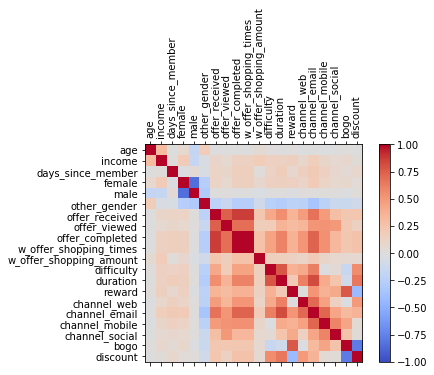

In [307]:
corr = full_w_offer_ml_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(full_w_offer_ml_df.corr().columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(full_w_offer_ml_df.corr().columns)
ax.set_yticklabels(full_w_offer_ml_df.corr().columns)

# Clustering Analysis

## Use all variables in the full_w_offer_ml_df data frame

In [276]:
from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split

In [277]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [278]:
ks = range(1, 6)
inertias = []

In [279]:
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=123)
    
    # Fit model to samples
    model.fit(full_w_offer_ml_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

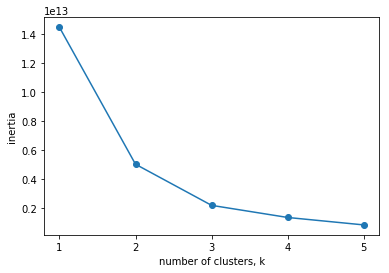

In [280]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [281]:
# Create a KMeans model with 2 clusters: model
model = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=123)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(full_w_offer_ml_df)

In [282]:
labels = pd.Series(labels)

In [283]:
full_w_offer_ml_df.shape, labels.shape

((33222, 20), (33222,))

In [284]:
full_w_offer_kmeans_df = pd.concat([full_w_offer_ml_df, labels], axis=1)

In [285]:
full_w_offer_kmeans_df["cluster_label"] = full_w_offer_kmeans_df[0]

In [286]:
full_w_offer_kmeans_df = full_w_offer_kmeans_df.drop(columns = [0])

In [287]:
full_w_offer_kmeans_df.head()

,age,income,days_since_member,female,male,other_gender,offer_received,offer_viewed,offer_completed,w_offer_shopping_times,...,difficulty,duration,reward,channel_web,channel_email,channel_mobile,channel_social,bogo,discount,cluster_label
0,68.0,65404.991568,1276,0,0,1,1.0,1.0,1.0,1.0,...,7.0,7.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1
1,68.0,65404.991568,1276,0,0,1,2.0,2.0,1.0,1.0,...,10.0,10.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1
2,55.0,112000.000000,1123,1,0,0,1.0,0.0,1.0,1.0,...,5.0,7.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0,0
3,68.0,65404.991568,761,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,75.0,100000.000000,1190,1,0,0,1.0,1.0,1.0,1.0,...,5.0,7.0,5.0,1.0,1.0,1.0,0.0,1.0,0.0,0


In [288]:
full_w_offer_kmeans_df.columns

Index(['age', 'income', 'days_since_member', 'female', 'male', 'other_gender',
       'offer_received', 'offer_viewed', 'offer_completed',
       'w_offer_shopping_times', 'w_offer_shopping_amount', 'difficulty',
       'duration', 'reward', 'channel_web', 'channel_email', 'channel_mobile',
       'channel_social', 'bogo', 'discount', 'cluster_label'],
      dtype='object')

In [305]:
labels.count(), labels.sum(), labels.count()-labels.sum()

(33222, 20914, 12308)

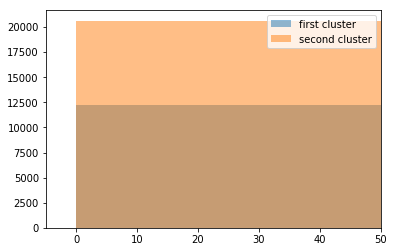

In [297]:
plt.hist(full_w_offer_kmeans_df.loc[full_w_offer_kmeans_df["cluster_label"] == 0, "w_offer_shopping_amount"], bins = 10, alpha=0.5, label="cluster 1")
plt.hist(full_w_offer_kmeans_df.loc[full_w_offer_kmeans_df["cluster_label"] == 1, "w_offer_shopping_amount"], bins = 10, alpha=0.5, label="cluster 2")
plt.xlim(-5, 50)
plt.legend(loc="upper right")

The class 1 spent almost double on the offer than the class 2

In [296]:
full_w_offer_kmeans_df.groupby("cluster_label")["w_offer_shopping_amount"].mean()

cluster_label
0    30.492442
1    14.948095
Name: w_offer_shopping_amount, dtype: float64

# Match transactions with offers (The Assumption is not true. Need to redo) 

# Things need to be considered. First, how to display the data. Second, how to select the data put into the cluster model.

# The next 5 steps genreate two trans dfs. One is related with offer and another contains all transactions that don't related with offers. 

## The assumption of this approach is when the customers use an offer the offer completed. And the transaction time is the same as the offer completed time. There is no multiple actions needed to complete an offer.

In [377]:
pt_com_df = pt_df.loc[(pt_df["portfolio_id"] != 0) & (pt_df["event"] == "offer completed"), \
                           ["event", "customer_id", "portfolio_id", "time"]]
pt_trans_df = pt_df.loc[(pt_df["portfolio_id"] == 0), ["customer_id", "time", "amount"]]

In [378]:
pt_com_trans_df = pt_com_df.merge(pt_trans_df, on =["customer_id", "time"], how="outer")

In [379]:
pt_com_trans_df.head()

,event,customer_id,portfolio_id,time,amount
0,offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,0,34.56
1,offer completed,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,0,18.97
2,offer completed,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,33.90
3,offer completed,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,0,18.01
4,offer completed,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,0,19.11


In [380]:
pt_trans_w_offer_df = pt_com_trans_df[~pt_com_trans_df["event"].isnull()]
pt_trans_wo_offer_df = pt_com_trans_df[pt_com_trans_df["event"].isnull()]

In [381]:
pt_trans_w_offer_df = pt_trans_w_offer_df.drop(columns = ["event"])

In [401]:
pt_trans_w_offer_matrix = pt_trans_w_offer_df.groupby(["customer_id", "portfolio_id"])\
.agg({"time":pd.Series.nunique, "amount":sum}).reset_index()

In [402]:
pt_trans_w_offer_matrix.head()

,customer_id,portfolio_id,time,amount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,10.27
1,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,8.57
2,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,14.11
3,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,22.05
4,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,11.93


In [404]:
pt_trans_w_offer_matrix = pt_trans_w_offer_matrix.rename(columns={"time":"w_offer_shopping_times", \
                                                                  "amount":"w_offer_shopping_amount"})

In [405]:
pt_trans_w_offer_matrix[(pt_trans_w_offer_matrix["customer_id"] == "56630668a08842a38f32bf4f7bfa4125") & \
               (pt_trans_w_offer_matrix["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")]

,customer_id,portfolio_id,complete_times,total_amount
9807,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,3,58.25


In [383]:
pt_trans_w_offer_df[(pt_trans_w_offer_df["customer_id"] == "56630668a08842a38f32bf4f7bfa4125") & \
               (pt_trans_w_offer_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")].sort_values("time")

,customer_id,portfolio_id,time,amount
503,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,12,17.29
13282,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,390,21.24
29736,56630668a08842a38f32bf4f7bfa4125,2906b810c7d4411798c6938adc9daaa5,618,19.72


In [406]:
pt_trans_wo_offer_df.head()

,event,customer_id,portfolio_id,time,amount
33579,NaN,02c083884c7d45b39cc68e1314fec56c,NaN,0,0.83
33580,NaN,54890f68699049c2a04d415abc25e717,NaN,0,13.23
33581,NaN,b2f1cd155b864803ad8334cdf13c4bd2,NaN,0,19.51
33582,NaN,bbeb54e861614fc7b22a8844f72dca6c,NaN,0,0.22
33583,NaN,a97e6f33219c432db82acfa0d19c602d,NaN,0,18.59


In [408]:
pt_trans_wo_offer_matrix = pt_trans_wo_offer_df.groupby("customer_id").agg({"time":pd.Series.nunique, "amount":sum}).reset_index()

In [410]:
pt_trans_wo_offer_matrix = pt_trans_wo_offer_matrix.rename(columns={"time":"wo_offer_shopping_times", \
                               "amount":"wo_offer_shopping_amount"})

In [411]:
pt_trans_wo_offer_matrix.head()

,customer_id,wo_offer_shopping_times,wo_offer_shopping_amount
0,0009655768c64bdeb2e877511632db8f,5,94.65
1,00116118485d4dfda04fdbaba9a87b5c,3,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,3,45.48
3,0020c2b971eb4e9188eac86d93036a77,6,161.99
4,0020ccbbb6d84e358d3414a3ff76cffd,9,117.55


In [166]:
# cus_rfm_sum_df = cus_rfm_df.groupby("RFMScore").agg({"customer_id": lambda x: len(x.unique()), \
#                                    "frequency": lambda x: round(x.mean(), 0), \
#                                    "recency": lambda x: round(x.mean(), 0), \
#                                     "monetary": lambda x: round(x.mean(), 0), \
#                                    "R": lambda x: round(x.mean(), 0), \
#                                     "F": lambda x: round(x.mean(), 0), \
#                                     "M": lambda x: round(x.mean(), 0)})

In [167]:
# cus_rfm_sum_df = cus_rfm_sum_df.sort_values("RFMScore")

In [168]:
# cus_rfm_sum_df

In [169]:
# cus_rfm_sum_df.groupby(["M", "R", "monetary"])["monetary"].count().sort_values(ascending = False)

In [170]:
# df_RFM_M = df_RFM_SUM.pivot(index='M', columns='R', values='Monetary')
# df_RFM_M= df_RFM_M.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
# print(df_RFM_M)

In [171]:
# cus_m_sum_df = cus_rfm_sum_df.pivot(index="M", columns = "R", values = "monetary")
# cus_m_sum_df = cus_m_sum_df.reset_index().sort_values(["M"], ascending = False).set_index(["M"])
# cus_m_sum_df

In [172]:
# cus_num_sum_df = cus_rfm_sum_df.pivot(index="M", columns = "R", values = "customer_id")
# cus_num_sum_df = cus_num_sum_df.reset_index().sort_values(["M"], ascending = False).set_index(["M"])
# cus_num_sum_df

In [173]:
# cus_r_sum_df = cus_rfm_sum_df.pivot(index="M", columns = "R", values = "recency")
# cus_r_sum_df = cus_r_sum_df.reset_index().sort_values(["M"], ascending = False).set_index(["M"])
# cus_r_sum_df

In [207]:
# trans_offer_tm_nc_df.shape, trans_trans_matrix.shape

In [208]:
# len(trans_offer_tm_nc_df["customer_id"].unique())

In [209]:
# trans_trans_matrix["purchased_yn"].columns.unique()

In [210]:
# trans_trans_matrix.head()

In [211]:
# for ind in inds:
#     try:
#         trans_offer_tm_nc_df.iloc[ind, -1] += trans_trans_matrix["purchased_yn"].loc \
#             [(trans_trans_matrix.index >= trans_offer_tm_nc_df.iloc[ind, 1])& \
#              (trans_trans_matrix.index <= trans_offer_tm_nc_df.iloc[ind, 2]), \
#              trans_offer_tm_nc_df.iloc[ind, 0]].sum()
#     except KeyError:
#         pass

In [212]:
# trans_offer_tm_nc_df

In [344]:
pt_trans_df = pt_df[pt_df["event"] == "transaction"] 
pt_offer_df = pt_df[pt_df["event"] != "transaction"]

In [345]:
pt_trans_df = pt_trans_df[["customer_id", "amount", "datetime", "time"]]
pt_trans_df = pt_trans_df.rename(columns = {"datetime":"transaction_date"})

In [346]:
pt_trans_df["transaction_date"] = pd.to_datetime(pt_trans_df["transaction_date"])
pt_trans_df["transaction_date"] = pt_trans_df["transaction_date"].dt.date

In [347]:
offer_type_df = pd.get_dummies(pt_offer_df["offer_type"])

In [348]:
pt_offer_df = pd.concat([pt_offer_df, offer_type_df], axis = 1)

In [358]:
pt_offer_received_df = pt_offer_df[pt_offer_df["event"] == "offer received"]
pt_offer_viewed_df = pt_offer_df[pt_offer_df["event"] == "offer viewed"]
pt_offer_completed_df = pt_offer_df[pt_offer_df["event"] == "offer completed"]

In [350]:
pt_offer_received_df.head()

,event,customer_id,time,reward_received,amount,portfolio_id,datetime,difficulty,duration,offer_type,reward_award,channel_web,channel_email,channel_mobile,channel_social,bogo,discount,informational
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,2020-05-01,5.0,7.0,bogo,5.0,1.0,1.0,1.0,0.0,1,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,20.0,10.0,discount,5.0,1.0,1.0,0.0,0.0,0,1,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,0,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-01,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0,0,1,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,0.0,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0,0,1,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,0,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,2020-05-01,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0,1,0,0


In [359]:
pt_offer_received_df["offer_end_date"] = pt_offer_received_df.loc[:, "datetime"] + \
pd.to_timedelta(pt_offer_received_df["duration"], unit='d')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [360]:
pt_offer_received_df = pt_offer_received_df[["customer_id", "portfolio_id", "datetime", "time", "offer_end_date", "bogo", "discount", "informational"]]

In [361]:
pt_offer_received_df = pt_offer_received_df.rename(columns = {"datetime":"offer_received_date"})

In [354]:
pt_offer_received_df.head()

,customer_id,portfolio_id,offer_received_date,time,offer_end_date,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,2020-05-01,0,2020-05-08,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,0,2020-05-11,0,1,0
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,2020-05-01,0,2020-05-08,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01,0,2020-05-11,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,2020-05-01,0,2020-05-06,1,0,0


In [362]:
pt_offer_viewed_df = pt_offer_viewed_df[["customer_id", "portfolio_id",  "datetime", "time"]]

In [363]:
pt_offer_viewed_df = pt_offer_viewed_df.rename(columns={"datetime":"offer_viewed_date"})

In [364]:
pt_offer_viewed_df.head()

,customer_id,portfolio_id,offer_viewed_date,time
12650,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,2020-05-01,0
12651,d1ede868e29245ea91818a903fec04c6,5a8bc65990b245e5a138643cd4eb9837,2020-05-01,0
12652,102e9454054946fda62242d2e176fdce,4d5c57ea9a6940dd891ad53e9dbe8da0,2020-05-01,0
12653,02c083884c7d45b39cc68e1314fec56c,ae264e3637204a6fb9bb56bc8210ddfd,2020-05-01,0
12655,be8a5d1981a2458d90b255ddc7e0d174,5a8bc65990b245e5a138643cd4eb9837,2020-05-01,0


In [365]:
pt_offer_completed_df = pt_offer_completed_df[["customer_id", "portfolio_id",  "datetime", "time"]]
pt_offer_completed_df = pt_offer_completed_df.rename(columns = {"datetime":"offer_completed_date"})

In [366]:
pt_offer_completed_df.head()

,customer_id,portfolio_id,offer_completed_date,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,2020-05-01,0
12672,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01,0
12679,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,2020-05-01,0
12692,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,2020-05-01,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,2020-05-01,0


# Use portfolio_id and customer_id as the joined keys can generate bugs. Because some customers received the same offer multiple times. Need to use time to rank each offer

In [261]:
pt_offer_new_df = pt_offer_received_df.merge(pt_offer_viewed_df, on =["customer_id", "portfolio_id"], how="left")\
.merge(pt_offer_completed_df, on=["customer_id", "portfolio_id"], how="left")

In [375]:
pt_offer_new_df[(pt_offer_new_df["offer_start_date"] > pt_offer_new_df["offer_viewed_date"])].head()

,customer_id,portfolio_id,offer_start_date,offer_viewed_date,offer_completed_date,offer_end_date,bogo,discount,informational
19288,0861b9ca31b741bb8b411b18f82d18f6,f19421c1d4aa40978ebb69ca19b0e20d,2020-05-08,2020-05-01,2020-05-02,2020-05-02,1,0,0
19289,0861b9ca31b741bb8b411b18f82d18f6,f19421c1d4aa40978ebb69ca19b0e20d,2020-05-08,2020-05-01,2020-05-08,2020-05-08,1,0,0
19290,0861b9ca31b741bb8b411b18f82d18f6,f19421c1d4aa40978ebb69ca19b0e20d,2020-05-08,2020-05-01,2020-05-18,2020-05-12,1,0,0
19299,d3f146b615514c6380b168bb3df5f05b,f19421c1d4aa40978ebb69ca19b0e20d,2020-05-08,2020-05-01,2020-05-05,2020-05-05,1,0,0
19300,d3f146b615514c6380b168bb3df5f05b,f19421c1d4aa40978ebb69ca19b0e20d,2020-05-08,2020-05-01,2020-05-10,2020-05-10,1,0,0


In [373]:
pt_df[(pt_df["customer_id"] == "56630668a08842a38f32bf4f7bfa4125") & \
               (pt_df["portfolio_id"] == "2906b810c7d4411798c6938adc9daaa5")].sort_values("time")

,event,customer_id,time,reward_received,amount,portfolio_id,datetime,difficulty,duration,offer_type,reward_award,channel_web,channel_email,channel_mobile,channel_social
5481,offer received,56630668a08842a38f32bf4f7bfa4125,0,0,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-01 00:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
18227,offer viewed,56630668a08842a38f32bf4f7bfa4125,12,0,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-01 12:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
18229,offer completed,56630668a08842a38f32bf4f7bfa4125,12,2,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-01 12:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
116358,offer received,56630668a08842a38f32bf4f7bfa4125,336,0,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-15 00:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
132963,offer viewed,56630668a08842a38f32bf4f7bfa4125,354,0,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-15 18:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
145490,offer completed,56630668a08842a38f32bf4f7bfa4125,390,2,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-17 06:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
257817,offer received,56630668a08842a38f32bf4f7bfa4125,576,0,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-25 00:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
279612,offer completed,56630668a08842a38f32bf4f7bfa4125,618,2,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-26 18:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0
286041,offer viewed,56630668a08842a38f32bf4f7bfa4125,636,0,0.0,2906b810c7d4411798c6938adc9daaa5,2020-05-27 12:00:00,10.0,7.0,discount,2.0,1.0,1.0,1.0,0.0


In [263]:
# pt_offer_new_df.loc[pt_offer_new_df["offer_end_date"] > pt_offer_new_df["offer_completed_date"], "offer_end_date"] \
# =pt_offer_new_df.loc[pt_offer_new_df["offer_end_date"] > pt_offer_new_df["offer_completed_date"], "offer_completed_date"]

In [264]:
pt_offer_new_df.head()

,customer_id,portfolio_id,offer_start_date,offer_end_date,bogo,discount,informational,offer_viewed_date,offer_completed_date
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,2020-05-01,2020-05-06 12:00:00,1,0,0,2020-05-01 06:00:00,2020-05-06 12:00:00
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-10 00:00:00,0,1,0,2020-05-01 06:00:00,NaT
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-10 00:00:00,0,1,0,2020-05-27 00:00:00,NaT
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,2020-05-01,2020-05-07 00:00:00,0,1,0,2020-05-01 18:00:00,NaT
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01,2020-05-10 00:00:00,0,1,0,2020-05-01 12:00:00,NaT


In [265]:
pt_offer_new_df["offer_start_date"] = pd.to_datetime(pt_offer_new_df["offer_start_date"])
pt_offer_new_df["offer_start_date"] = pt_offer_new_df["offer_start_date"].dt.date

pt_offer_new_df["offer_end_date"] = pd.to_datetime(pt_offer_new_df["offer_end_date"])
pt_offer_new_df["offer_end_date"] = pt_offer_new_df["offer_end_date"].dt.date

pt_offer_new_df["offer_viewed_date"] = pd.to_datetime(pt_offer_new_df["offer_viewed_date"])
pt_offer_new_df["offer_viewed_date"] = pt_offer_new_df["offer_viewed_date"].dt.date

pt_offer_new_df["offer_completed_date"] = pd.to_datetime(pt_offer_new_df["offer_completed_date"])
pt_offer_new_df["offer_completed_date"] = pt_offer_new_df["offer_completed_date"].dt.date

In [266]:
pt_offer_new_df = pt_offer_new_df[["customer_id", "portfolio_id", "offer_start_date", "offer_viewed_date",\
                                  "offer_completed_date", "offer_end_date", "bogo", "discount", "informational"]]

In [267]:
pt_offer_new_df.head()

,customer_id,portfolio_id,offer_start_date,offer_viewed_date,offer_completed_date,offer_end_date,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,2020-05-01,2020-05-01,2020-05-06,2020-05-06,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-01,NaT,2020-05-10,0,1,0
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-27,NaT,2020-05-10,0,1,0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,2020-05-01,2020-05-01,NaT,2020-05-07,0,1,0
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01,2020-05-01,NaT,2020-05-10,0,1,0


In [268]:
pt_offer_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 9 columns):
customer_id             115609 non-null object
portfolio_id            115609 non-null object
offer_start_date        115609 non-null object
offer_viewed_date       98933 non-null object
offer_completed_date    67397 non-null object
offer_end_date          115609 non-null object
bogo                    115609 non-null uint8
discount                115609 non-null uint8
informational           115609 non-null uint8
dtypes: object(6), uint8(3)
memory usage: 6.5+ MB


In [270]:
pt_offer_new_df.head()

,customer_id,portfolio_id,offer_start_date,offer_viewed_date,offer_completed_date,offer_end_date,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,2020-05-01,2020-05-01,2020-05-06,2020-05-06,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-01,NaT,2020-05-10,0,1,0
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-27,NaT,2020-05-10,0,1,0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,2020-05-01,2020-05-01,NaT,2020-05-07,0,1,0
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01,2020-05-01,NaT,2020-05-10,0,1,0


In [271]:
# pt_offer_new_df.loc[pt_offer_new_df["offer_end_date"] > pt_offer_new_df["offer_completed_date"], "offer_end_date"]\
# = pt_offer_new_df.loc[pt_offer_new_df["offer_end_date"] > pt_offer_new_df["offer_completed_date"], "offer_completed_date"]

In [272]:
pt_offer_new_df.head()

,customer_id,portfolio_id,offer_start_date,offer_viewed_date,offer_completed_date,offer_end_date,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,2020-05-01,2020-05-01,2020-05-06,2020-05-06,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-01,NaT,2020-05-10,0,1,0
2,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,2020-05-01,2020-05-27,NaT,2020-05-10,0,1,0
3,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,2020-05-01,2020-05-01,NaT,2020-05-07,0,1,0
4,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,2020-05-01,2020-05-01,NaT,2020-05-10,0,1,0


In [273]:
src_df = pt_df[["customer_id", "datetime"]]

In [274]:
src_df["date"] = src_df["datetime"].dt.date

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
src_df = src_df.drop(columns=["datetime"])

In [276]:
src_df = src_df.drop_duplicates()

In [277]:
offers = pt_offer_new_df["portfolio_id"].unique()

In [278]:
pt_final_df = pd.DataFrame()

In [293]:
def full_fill_offer_dates(offer_id):
    '''
    INPUT: offer_id string
    
    OUTPUT: a dataframe with offer start date and offer end date fulfilled
    
    '''
    
    #subset offer related activities by offer_id
    pt_offer_new_sub_df = pt_offer_new_df.loc[pt_offer_new_df["portfolio_id"] == offer_id, \
                                         ["customer_id", "portfolio_id", "offer_start_date", "offer_viewed_date",\
                                         "offer_completed_date", "offer_end_date"]]
    
    #subset transaction activities of the customers who received the offer
    pt_trans_sub_df = pt_trans_df[pt_trans_df["customer_id"].isin(pt_offer_new_sub_df["customer_id"].unique())]
    
    #subset offer end date
    pt_offer_new_sub_end_df = pt_offer_new_sub_df[["customer_id", "offer_end_date"]]
    
    #drop offer_end_date from the original offer related dataframe
    pt_offer_new_sub_df = pt_offer_new_sub_df.drop(columns=["offer_end_date"])
    pt_offer_new_sub_df = pt_offer_new_sub_df.drop_duplicates()
    
    #join offer related dataframes with transaction dataframe
    pt_sub_final_df = src_df.merge(pt_offer_new_sub_df, left_on =["customer_id", "date"],\
                                   right_on=["customer_id", "offer_start_date"],\
            how="left").merge(pt_offer_new_sub_end_df, left_on =["customer_id", "date"],\
                             right_on = ["customer_id", "offer_end_date"], how = "left").merge(pt_trans_sub_df, \
                            left_on = ["customer_id", "date"], right_on=["customer_id", "transaction_date"],\
                            how = "left").drop_duplicates()
    
    #Fulfill the offer start date and offer end date
    pt_sub_final_df["offer_start_date"] = \
    pt_sub_final_df.sort_values(["customer_id", "date"]).groupby("customer_id")["offer_start_date"].apply(lambda x: x.ffill())
    pt_sub_final_df["offer_end_date"] = \
    pt_sub_final_df.sort_values(["customer_id", "date"]).groupby("customer_id")["offer_end_date"].apply(lambda x: x.bfill().ffill())
#     pt_sub_final_df.loc[(pt_sub_final_df["offer_start_date"].isnull()), "offer_end_date"] \
#     = pt_sub_final_df.loc[(pt_sub_final_df["offer_start_date"].isnull()), "offer_start_date"]
    
#     pt_sub_final_df["offer_start_date"] = pt_sub_final_df["offer_start_date"]
#     pt_sub_final_df["offer_viewed_date"] = pt_sub_final_df["offer_viewed_date"]
#     pt_sub_final_df["offer_completed_date"] = pt_sub_final_df["offer_completed_date"]
#     pt_sub_final_df["offer_end_date"] = pt_sub_final_df["offer_end_date"]
    pt_sub_final_df["transaction_date"] = pd.to_datetime(pt_sub_final_df["transaction_date"])
    pt_sub_final_df["transaction_date"] = pt_sub_final_df["transaction_date"].dt.date
    
    return pt_sub_final_df

In [281]:
def full_fill_offer_dates_v2(offer_id):
    '''
    INPUT: offer_id string
    
    OUTPUT: a dataframe with offer start date and offer end date fulfilled
    
    '''
    
    #subset offer related activities by offer_id
    pt_offer_new_sub_df = pt_offer_new_df.loc[pt_offer_new_df["portfolio_id"] == offer_id, \
                                         ["customer_id", "portfolio_id", "offer_start_date", "offer_viewed_date",\
                                         "offer_completed_date", "offer_end_date"]]
    
    #subset transaction activities of the customers who received the offer
#     pt_trans_sub_df = pt_trans_df[pt_trans_df["customer_id"].isin(pt_offer_new_sub_df["customer_id"].unique())]
    
    #subset offer end date
    pt_offer_new_sub_end_df = pt_offer_new_sub_df[["customer_id", "offer_end_date"]]
    
    #drop offer_end_date from the original offer related dataframe
    pt_offer_new_sub_df = pt_offer_new_sub_df.drop(columns=["offer_end_date"])
    pt_offer_new_sub_df = pt_offer_new_sub_df.drop_duplicates()
    
    #join offer related dataframes with transaction dataframe
    pt_sub_final_df = src_df.merge(pt_offer_new_sub_df, left_on =["customer_id", "date"],\
                                   right_on=["customer_id", "offer_start_date"],\
            how="left").merge(pt_offer_new_sub_end_df, left_on =["customer_id", "date"],\
                             right_on = ["customer_id", "offer_end_date"], how = "left")\
#                             .merge(pt_trans_sub_df, \
#                             left_on = ["customer_id", "date"], right_on=["customer_id", "transaction_date"],\
#                             how = "left")\
#             .drop_duplicates()
    
    #Fulfill the offer start date and offer end date
    pt_sub_final_df["offer_start_date"] = \
    pt_sub_final_df.sort_values(["customer_id", "date"]).groupby("customer_id")["offer_start_date"].apply(lambda x: x.ffill())
    pt_sub_final_df["offer_end_date"] = \
    pt_sub_final_df.sort_values(["customer_id", "date"]).groupby("customer_id")["offer_end_date"].apply(lambda x: x.bfill().ffill())
#     pt_sub_final_df.loc[(pt_sub_final_df["offer_start_date"].isnull()), "offer_end_date"] \
#     = pt_sub_final_df.loc[(pt_sub_final_df["offer_start_date"].isnull()), "offer_start_date"]
    
    return pt_sub_final_df

IndentationError: unexpected indent (<ipython-input-281-57435ed960ac>, line 26)

In [ ]:
# test_offer_id = "9b98b8c7a33c4b65b9aebfe6a799e6d9"
# test_offer_df = full_fill_offer_dates(test_offer_id)
# test_offer_df.head()

In [ ]:
# test_offer_df[test_offer_df["customer_id"] == "e2127556f4f64592b11af22de27a7932"].sort_values("date")

In [294]:
for offer_id in offers:
    pt_final_df = pt_final_df.append(full_fill_offer_dates(offer_id))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [295]:
pt_final_df.head()

,amount,customer_id,date,index,offer_completed_date,offer_end_date,offer_start_date,offer_viewed_date,portfolio_id,transaction_date
0,NaN,78afa995795e4d85b5d9ceeca43f5fef,2020-05-01,0.0,2020-05-06,2020-05-06,2020-05-01,2020-05-01,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaT
1,NaN,a03223e636434f42ac4c3df47e8bac43,2020-05-01,1.0,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,e2127556f4f64592b11af22de27a7932,2020-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,8ec6ce2a7e7949b1bf142def7d0e0586,2020-05-01,3.0,NaN,NaN,NaN,NaN,NaN,NaT
4,NaN,68617ca6246f4fbc85e91a2a49552598,2020-05-01,4.0,NaN,NaN,NaN,NaN,NaN,NaT


In [296]:
pt_final_df = pt_final_df.drop_duplicates().reset_index()

In [297]:
pt_final_df.head()

,level_0,amount,customer_id,date,index,offer_completed_date,offer_end_date,offer_start_date,offer_viewed_date,portfolio_id,transaction_date
0,0,NaN,78afa995795e4d85b5d9ceeca43f5fef,2020-05-01,0.0,2020-05-06,2020-05-06,2020-05-01,2020-05-01,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaT
1,1,NaN,a03223e636434f42ac4c3df47e8bac43,2020-05-01,1.0,NaN,NaN,NaN,NaN,NaN,NaT
2,2,NaN,e2127556f4f64592b11af22de27a7932,2020-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaT
3,3,NaN,8ec6ce2a7e7949b1bf142def7d0e0586,2020-05-01,3.0,NaN,NaN,NaN,NaN,NaN,NaT
4,4,NaN,68617ca6246f4fbc85e91a2a49552598,2020-05-01,4.0,NaN,NaN,NaN,NaN,NaN,NaT


In [298]:
pt_sub_final_df = pt_final_df[["customer_id","date", "offer_start_date",\
                                  "offer_end_date", "amount", "transaction_date"]].drop_duplicates()

In [299]:
pt_sub_final_df = pt_sub_final_df[(~pt_sub_final_df["offer_end_date"].isnull())
                 & (~pt_sub_final_df["transaction_date"].isnull())]

In [300]:
pt_test_sub_df = pt_sub_final_df.sort_values(by=["customer_id", "transaction_date"]).drop_duplicates()

In [301]:
pt_test_sub_df["transaction_date"] = pd.to_datetime(pt_test_sub_df["transaction_date"])
pt_test_sub_df["transaction_date"] = pt_test_sub_df["transaction_date"].dt.date

In [ ]:
(pt_test_sub_df.loc[pt_test_sub_df.index == 165211, "transaction_date"] >=\
pt_test_sub_df.loc[pt_test_sub_df.index == 165211, "offer_start_date"]) &\
(pt_test_sub_df.loc[pt_test_sub_df.index == 165211, "transaction_date"] <=\
pt_test_sub_df.loc[pt_test_sub_df.index == 165211, "offer_end_date"])

In [302]:
pt_test_sub_df["offer_amount"] = pt_test_sub_df.apply(lambda x: x["amount"] if (x["transaction_date"] == x["offer_end_date"]) else 0, axis = 1)

In [246]:
# pt_offer_df["offer_end_date"] = pt_offer_df.loc[pt_offer_df["event"] == "offer received", "datetime"] + \
# pd.to_timedelta(pt_offer_df["duration"]-1, unit='d')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [248]:
# pt_offer_df = pt_offer_df.sort_values(by=["customer_id", "portfolio_id", "datetime"]).fillna(method = "ffill")

In [ ]:
pt_offer_sub_df = pt_offer_df[["event", "customer_id","portfolio_id", "datetime", "offer_end_date", "offer_type"]]

In [ ]:
# pt_offer_sub_rank = pt_offer_sub_df.groupby(["customer_id", "portfolio_id", "offer_end_date"])["datetime"].rank()

In [ ]:
# pt_offer_sub_rank_df = pd.concat([pt_offer_sub_df, pt_offer_sub_rank], axis = 1)

In [ ]:
# test_df = pt_offer_sub_df[pt_offer_sub_df["customer_id"] == "05018c82b3d241328a5b0558dada3286"].sort_values("offer_end_date")

In [ ]:
# test_df.columns = ["event", "customer_id","portfolio_id", "datetime", "offer_end_date", "rank" ]
# test_df = test_df.drop(columns = ["rank"])
# test_df.head()

In [ ]:
pt_offer_sub_df.loc[pt_offer_sub_df["event"] == "offer received", "offer_start_date"] = \
pt_offer_sub_df.loc[pt_offer_sub_df["event"] == "offer received", "datetime"]
pt_offer_sub_df.loc[pt_offer_sub_df["event"] == "offer viewed", "offer_viewed_date"] = \
pt_offer_sub_df.loc[pt_offer_sub_df["event"] == "offer viewed", "datetime"]
pt_offer_sub_df.loc[pt_offer_sub_df["event"] == "offer completed", "offer_completed_date"] = \
pt_offer_sub_df.loc[pt_offer_sub_df["event"] == "offer completed", "datetime"]
pt_offer_sub_df.head()

In [ ]:
pt_offer_sub_df["offer_start_date"] = pt_offer_sub_df.sort_values(by=["customer_id", "portfolio_id", "datetime"])["offer_start_date"].fillna(method="ffill")

In [ ]:
pt_offer_sub_df = pt_offer_sub_df[["customer_id", "portfolio_id", "offer_type", "offer_start_date", "offer_viewed_date", "offer_completed_date", "offer_end_date"]]

In [ ]:
# test_df_v2.sort_values(by=["customer_id", "portfolio_id", "offer_start_date", "offer_end_date"])

In [ ]:
# pt_offer_sub_df.loc[pt_offer_sub_df["offer_start_date"].isnull(), "offer_start_date"] = \
# pt_offer_sub_df.loc[pt_offer_sub_df["offer_start_date"].isnull(), "offer_end_date"] - \
# pd.to_timedelta(pt_offer_df["duration"], unit='d')
# pt_offer_df.loc[pt_offer_df["event"] == "offer received", "datetime"] + \
# pd.to_timedelta(pt_offer_df["duration"], unit='d')

In [ ]:
pt_offer_sub_df.head()

In [ ]:
pt_offer_sub_df[pt_offer_sub_df["customer_id"] == "0009655768c64bdeb2e877511632db8f"]

In [ ]:
pt_df[pt_df["customer_id"] == "0009655768c64bdeb2e877511632db8f"]

In [ ]:
# pt_df[(pt_df["customer_id"] == "0009655768c64bdeb2e877511632db8f")\
#       & (pt_df["portfolio_id"].isin(["f19421c1d4aa40978ebb69ca19b0e20d", "3f207df678b143eea3cee63160fa8bed"]))]

In [ ]:
# pt_offer_sub_df[["customer_id", "portfolio_id"]].drop_duplicates(). \
# groupby("customer_id")["portfolio_id"].nunique().sort_values(ascending=False)

In [ ]:
# pt_offer_sub_df[pt_offer_sub_df["customer_id"] == "0009655768c64bdeb2e877511632db8f"].sort_values(by="offer_start_date")

In [ ]:
pt_offer_sub_df.isnull().sum()

In [ ]:
pt_offer_final_df = pt_offer_sub_df.groupby(["customer_id", "portfolio_id", "offer_start_date", "offer_end_date", "offer_type"]) \
.agg({"offer_viewed_date":max, "offer_completed_date":max \
     }).reset_index()[["customer_id","offer_type", "offer_start_date", "offer_viewed_date", \
                                          "offer_completed_date", "offer_end_date"]]

In [ ]:
pt_offer_final_df.head()

In [ ]:
pt_offer_type_dummy_df = pd.get_dummies(pt_offer_final_df["offer_type"])

In [ ]:
pt_offer_final_df = pd.concat([pt_offer_final_df, pt_offer_type_dummy_df], axis = 1)

In [ ]:
pt_offer_final_df[pt_offer_final_df["customer_id"] == "eb540099db834cf59001f83a4561aef3"]

In [ ]:
# pd_offer_dummy = pd.get_dummies(pt_offer_sub_rank_df["event"])

In [ ]:
# pt_offer_dummy_df = pd.concat([pt_offer_sub_rank_df, pd_offer_dummy], axis = 1)

In [ ]:
# pt_offer_dummy_df["event"].unique()

In [ ]:
# pt_offer_dummy_df.head()

In [ ]:
# pt_dummy_trans_df = pt_sub_dummy_df.loc[pt_sub_dummy_df["portfolio_id"] == 0, \
#                     ["datetime", "customer_id", "transaction"]]
pt_trans_sub_df = pt_trans_df[["customer_id", "datetime", "amount"]]
pt_trans_sub_df.head()

In [ ]:
pt_trans_sub_df = pt_trans_sub_df.rename(columns = {"datetime":"transaction_datetime"})

In [ ]:
pt_trans_sub_df.head()

In [ ]:
# pt_dummy_offer_df.shape, pt_dummy_trans_df.shape

In [ ]:
# pt_new_df = pt_dummy_offer_df.merge(pt_dummy_trans_df, how="outer", on = ["datetime", "customer_id"])

In [ ]:
# pt_new_df = pt_new_df.sort_values(by=["customer_id", "datetime"])

In [ ]:
# pt_new_df.loc[pt_new_df["customer_id"] == "0009655768c64bdeb2e877511632db8f", \
#              ["customer_id", "datetime", "offer received", "offer viewed", "offer completed", \
#              "transcation", "offer_end_date"]]

In [ ]:
# pt_sub_dummy_df["trans_datetime"] 
# df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

# pt_sub_dummy_df.loc[pt_sub_dummy_df["transaction"] == 1, "transaction_date"] \
# = pt_sub_dummy_df.loc[pt_sub_dummy_df["transaction"] == 1, "datetime"]
# pt_offer_dummy_df.loc[pt_offer_dummy_df["offer received"] == 1, "offer_start_date"] \
# = pt_offer_dummy_df.loc[pt_offer_dummy_df["offer received"] == 1, "datetime"]
# pt_offer_dummy_df.loc[pt_offer_dummy_df["offer viewed"] == 1, "offer_viewed_date"] \
# = pt_offer_dummy_df.loc[pt_offer_dummy_df["offer viewed"] == 1, "datetime"]
# pt_offer_dummy_df.loc[pt_offer_dummy_df["offer completed"] == 1, "offer_completed_date"] \
# = pt_offer_dummy_df.loc[pt_offer_dummy_df["offer completed"] == 1, "datetime"]

In [ ]:
# pt_offer_final_df = pt_offer_dummy_df[["customer_id", "portfolio_id", "offer_start_date", \
#                                    "offer_viewed_date", "offer_completed_date", "offer_end_date", "rank"]]

In [ ]:
pt_offer_final_df = pt_offer_final_df.drop(columns = ["offer_type"])

In [ ]:
pt_offer_final_df.head()

In [ ]:
pt_trans_sub_df.head()

In [ ]:
# pt_offer_final_new_df = pt_offer_final_df.groupby(["customer_id", "portfolio_id", "rank"]) \
# .agg({"offer_start_date":max, "offer_viewed_date":max, "offer_completed_date":max, \
#      "offer_end_date":max}).reset_index()[["customer_id", "offer_start_date", "offer_viewed_date", \
#                                           "offer_completed_date", "offer_end_date"]]

In [ ]:
pt_offer_final_df.head()

In [ ]:
pt_offer_final_df.shape, pt_trans_sub_df.shape

# Need to double check the logic and the final results have duplications

In [ ]:
pt_new_df = pt_trans_sub_df.merge(pt_offer_final_df, how="outer", on="customer_id") \
.sort_values(by=["transaction_datetime", "offer_start_date"])

In [ ]:
pt_new_df.info()

In [ ]:
pt_new_df.isnull().sum()

In [ ]:
pt_new_df["transaction_date"] = pd.to_datetime(pt_new_df["transaction_datetime"])
pt_new_df["offer_start_date"] = pd.to_datetime(pt_new_df["offer_start_date"])
pt_new_df["offer_viewed_date"] = pd.to_datetime(pt_new_df["offer_viewed_date"])
pt_new_df["offer_completed_date"] = pd.to_datetime(pt_new_df["offer_completed_date"])
pt_new_df["offer_end_date"] = pd.to_datetime(pt_new_df["offer_end_date"])

In [ ]:
pt_new_df.info()

In [ ]:
pt_new_df.duplicated().sum()

In [ ]:
pt_new_df.sort_values(["customer_id", "transaction_datetime"]).head()

In [ ]:
len(pt_new_df.loc[pt_new_df["offer_start_date"].isnull(), "customer_id"].unique())

In [ ]:
transcript.loc[transcript["customer_id"].isin\
               (pt_new_df.loc[pt_new_df["offer_start_date"].isnull(), "customer_id"].unique()), "event"].unique()

In [ ]:
pt_new_no_offer_df = pt_new_df.loc[pt_new_df["offer_start_date"].isnull(), ["customer_id", "transaction_date", "amount"]]

In [ ]:
pt_new_no_offer_df = pt_new_no_offer_df.groupby("customer_id").agg({"transaction_date": lambda x: len(x.unique()), \
                                   "amount": lambda x: round(x.sum(), 2)}).reset_index()

In [ ]:
pt_new_no_offer_df

In [ ]:
pt_new_no_offer_df = pt_new_no_offer_df.rename(columns = {"transaction_date":"purchased_times", "amount":"purchased_amount"})

In [ ]:
# pt_new_no_offer_df["offer_start_date"] = pd.NaT
# pt_new_no_offer_df["offer_viewed_date"] = pd.NaT
# pt_new_no_offer_df["offer_completed_date"] = pd.NaT
# pt_new_no_offer_df["offer_end_date"] = pd.NaT

In [ ]:
pt_new_no_offer_df.head()

In [ ]:
pt_new_w_offer_df = pt_new_df.loc[~pt_new_df["offer_start_date"].isnull(), :]

In [ ]:
pt_new_w_offer_df.head()

In [ ]:
pt_new_w_offer_df["offer_actual_end_date"] = pt_new_w_offer_df.apply(lambda x: x["offer_completed_date"] if x["offer_completed_date"] < x["offer_end_date"] \
                       else x["offer_end_date"], axis = 1)

In [ ]:
pt_new_w_offer_df["offer_actual_end_date"]  = pd.to_datetime(pt_new_w_offer_df["offer_actual_end_date"])

In [ ]:
pt_new_w_offer_df.head()

In [ ]:
pt_new_w_offer_df["offer_start_date"] = pt_new_w_offer_df["offer_start_date"].dt.date
pt_new_w_offer_df["transaction_datetime"] = pt_new_w_offer_df["transaction_datetime"].dt.date
pt_new_w_offer_df["offer_actual_end_date"] = pt_new_w_offer_df["offer_actual_end_date"].dt.date

In [ ]:
pt_new_w_offer_df["purchased_yn"] = (pt_new_w_offer_df["offer_start_date"] <= pt_new_w_offer_df["transaction_datetime"]) \
& (pt_new_w_offer_df["transaction_datetime"] <= pt_new_w_offer_df["offer_actual_end_date"])

In [ ]:
pt_new_w_offer_df.head()

In [ ]:
pt_new_w_offer_df.isnull().sum()

In [ ]:
pt_new_w_offer_df["purchased_amount"] = pt_new_w_offer_df["purchased_yn"] * pt_new_w_offer_df["amount"]

In [ ]:
pt_new_w_offer_df.head()

In [ ]:
# pt_offer_final_df = pt_sub_final_new_df.drop(columns = ["transaction_date"])

In [ ]:
pt_new_w_offer_df_v1 = pt_new_w_offer_df.groupby(["customer_id", "offer_start_date", "offer_end_date"]) \
.agg({"purchased_yn":sum, "purchased_amount":sum}).reset_index()

In [ ]:
pt_new_w_offer_df_v1 = pt_new_w_offer_df_v1.rename(columns = {"purchased_yn":"purchased_times"})

In [ ]:
pt_new_w_offer_df_v2 = pt_new_w_offer_df.groupby(["customer_id", "offer_start_date", "offer_viewed_date", \
                                                  "offer_completed_date", "offer_end_date"]) \
.agg({"purchased_yn":sum, "purchased_amount":sum}).reset_index()

In [ ]:
pt_new_w_offer_df_v2 = pt_new_w_offer_df_v2.rename(columns = {"purchased_yn":"purchased_times"})

In [ ]:
pt_df.loc[(pt_df["customer_id"] == "0009655768c64bdeb2e877511632db8f") & \
          (pt_df["portfolio_id"] == 0), \
          ["customer_id", "amount", "datetime"]].sort_values(by="datetime")
# pt_sub_final_new_df[pt_sub_final_new_df["customer_id"] == "0009655768c64bdeb2e877511632db8f"]

In [ ]:
pt_new_w_offer_df.loc[pt_new_w_offer_df["customer_id"] == "0009655768c64bdeb2e877511632db8f", \
              :].sort_values(by="offer_start_date")

In [ ]:
pt_new_w_offer_df_v1.loc[pt_new_w_offer_df_v1["customer_id"] == "0009655768c64bdeb2e877511632db8f", \
              :].sort_values(by="offer_start_date")

In [ ]:
pt_df[(pt_df["customer_id"] == "0009655768c64bdeb2e877511632db8f") & \
     (pt_df["amount"] == 0)
     ].sort_values(by="datetime")

In [ ]:
# customer_id = "0009655768c64bdeb2e877511632db8f"
# (pt_trans_sub_df.loc[pt_trans_sub_df["customer_id"] == customer_id, "transaction_datetime"] >= \
# pt_offer_final_df.loc[pt_offer_final_df["customer_id"] == customer_id, "offer_start_date"]) \
# & (pt_trans_sub_df.loc[pt_trans_sub_df["customer_id"] == customer_id, "transaction_datetime"] <= \
# pt_offer_final_df.loc[pt_offer_final_df["customer_id"] == customer_id, "offer_end_date"])

In [ ]:
pt_new_w_offer_df.loc[(pt_new_w_offer_df["customer_id"] == "0009655768c64bdeb2e877511632db8f"), \
             ["customer_id", "transaction_datetime", "offer_start_date", "offer_end_date","offer_actual_end_date" "purchased_yn", "purchased_amount"]
             ]

In [ ]:
pt_new_w_offer_df.loc[pt_new_w_offer_df["customer_id"] == "0009655768c64bdeb2e877511632db8f", "purchased_amount"].sum()

In [ ]:
pt_new_w_offer_df_v1[pt_new_w_offer_df_v1["customer_id"] == "0009655768c64bdeb2e877511632db8f"]

In [ ]:
transcript.loc[transcript["customer_id"] == "0009655768c64bdeb2e877511632db8f", "amount"].sum()

In [ ]:
transcript.loc[transcript["customer_id"] == "0009655768c64bdeb2e877511632db8f", :]

In [ ]:
pt_new_w_offer_df_v1.loc[pt_new_w_offer_df_v1["customer_id"] == "0009655768c64bdeb2e877511632db8f", "purchased_amount"].sum()

In [ ]:
pt_new_w_offer_df_v2[pt_new_w_offer_df_v2["customer_id"] == "0009655768c64bdeb2e877511632db8f"]

In [ ]:
pt_new_w_offer_df_v2.loc[pt_new_w_offer_df_v2["customer_id"] == "0009655768c64bdeb2e877511632db8f", "purchased_amount"].sum()

In [ ]:
pt_df.loc[pt_df["event"] == "transaction", "difficulty"].unique()

In [ ]:
total_difficult_count = pt_df.groupby('difficulty')['event'].count().sort_values(ascending = False)

In [ ]:
total_received_difficult_count = pt_df[pt_df['event'] == 'offer received'].groupby('difficulty')['difficulty'].count().sort_values(ascending = False)

In [ ]:
total_received_difficult_count

In [ ]:
plt.scatter(total_received_difficult_count.index, total_received_difficult_count.values)

In [ ]:
total_received_diffcult_pct = round(total_received_difficult_count/total_difficult_count, 2).sort_values(ascending = False)

In [ ]:
total_received_diffcult_pct

In [ ]:
plt.scatter(total_received_diffcult_pct.index, total_received_diffcult_pct.values)

In [ ]:
total_viewed_difficult_count = pt_df[pt_df['event'] == 'offer viewed'].groupby('difficulty')['difficulty'].count().sort_values(ascending = False)

In [ ]:
round(total_viewed_difficult_count/total_difficult_count, 2).sort_values(ascending = False)

In [ ]:
total_done_difficult_count = pt_df[pt_df['event'] == 'offer completed'].groupby('difficulty')['difficulty'].count().sort_values(ascending = False)

In [ ]:
round(total_done_difficult_count/total_difficult_count, 2).sort_values(ascending = False)

In [ ]:
pt_df[(pt_df["portfolio_id"] == "9b98b8c7a33c4b65b9aebfe6a799e6d9") & (pt_df["event"] == "offer received")].groupby("customer_id")["time"].min().sort_values()

In [ ]:
# transcript[transcript['amount']>0].head()

In [ ]:
# pt_df.groupby('offer_type')['event'].count().sort_values(ascending = False)

In [ ]:
# total_reward_award = pt_df.groupby('reward_award')['reward_award'].count().sort_values(ascending = False)

In [ ]:
# total_event_done = pt_df[pt_df['event'] == 'offer completed'].groupby('reward_award')['reward_award'].count().sort_values(ascending = False)

In [ ]:
# round((total_event_done/total_reward_award), 2).sort_values(ascending = False)

In [ ]:
# pt_df.sort_values(['customer_id', 'portfolio_id', 'time'], ascending = [True, True, True])

In [ ]:
# total_duration_count = pt_df.groupby('duration')['duration'].count().sort_values(ascending = False)
# total_done_duration_count = pt_df[pt_df['event'] == 'offer completed'].groupby('duration')['duration'].count().sort_values(ascending = False)

In [ ]:
# total_duration_count

In [ ]:
# total_done_duration_count

In [ ]:
# pt_df.loc[pt_df['event'] == 'offer completed', 'duration'].unique()

In [ ]:
# round(total_done_duration_count/total_duration_count, 2).sort_values(ascending = False)

In [ ]:
# pt_df.head()

In [ ]:
# pt_df_staging = pt_df[['customer_id', 'portfolio_id', 'event', 'time']]

In [ ]:
# events = pt_df_staging['event'].unique().tolist()
# events

In [ ]:
# for event in events:
#     event_name = event + str(' time')
#     pt_df_staging[event_name] = pt_df_staging.apply(lambda x: x['time'] if x['event'] == event else 0, axis = 1)
# pt_df_staging.head()    

In [ ]:
# pt_df_staging = pt_df_staging.sort_values(['customer_id', 'time', 'portfolio_id'], ascending = [True, True, True])

In [ ]:
# pt_df_staging_offer = pt_df_staging[pt_df_staging['event'] != 'transaction'].groupby(['customer_id', 'portfolio_id']).agg({'offer received time':max, 'offer viewed time':max, 'offer completed time':max}).reset_index()

In [ ]:
# pt_df_staging_customer = pt_df_staging.loc[pt_df_staging['event'] == 'transaction', ['customer_id', 'transaction time']]

In [ ]:
# pt_df_staging_offer.head()

In [ ]:
# pt_df_staging.loc[pt_df_staging['event'] == 'transaction', ['customer_id', 'transaction time']].head()

## Profile x Transcript

In [ ]:
# ct_df = transcript.merge(profile, how='inner', on='customer_id')
# ct_df.head()

In [ ]:
# ct_df.loc[ct_df['event'] == 'offer completed', ['days_since_member', 'age', 'income']].describe()

In [ ]:
# profile[['days_since_member', 'age', 'income']].describe()